# Lending Club Case Study

## Business Understanding

**Lending Club**, a consumer finance company, which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
<br><br>
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. **Two types of risks** are associated with the bank’s decision:

-  If the applicant is **likely to repay the loan, then not approving the loan results in a loss of business** to the company.

-  If the applicant is **not likely to repay the loan, then approving the loan may lead to a financial loss** for the company.

<br><br>
When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

    -  **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

    -  **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    -  **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan. These candidates are not labelled as '**defaulters**'.


2. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objective
Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. The objective is to **identify the risky loan applicants using EDA**, then such loans can be reduced thereby cutting down the amount of credit loss.

In other words, the company wants to understand the **driving factors** (**or driver variables**) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Goal of Data Analysis
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In this case study, we will use Exploratory Data Analysis to understand how consumer attributes and loan attributes influence the tendency of default.

## Data Understanding

In [1]:
# Import libraries

import chardet
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Find the encoding of data using chardet

data = open('./loan.csv','rb').read()
result = chardet.detect(data)
print(result['encoding'])

utf-8


In [3]:
# Load the dataset

loan_data = pd.read_csv('./loan.csv', encoding='utf-8', low_memory=False) # low_memory=False avoids guessing dtypes for each column which requires memory
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Dataset Information

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

### Handling Missing Values

In [5]:
# Count of missing values in each column

loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# Percentage of missing values in each column

missing_values_columns = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

<br>It can be seen that there are columns with 93%, 97% and 100% missing values, we need to remove them, as these columns does not give any information.<br>

#### Treating Missing Values in Columns

In [7]:
# Find the columns having more than 90% missing values

missing_values_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]

missing_values_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [8]:
# Remove the columns having more than 90% missing values

loan_data = loan_data.drop(missing_values_columns, axis=1)

In [9]:
# Percentage of missing values in each column after dropping more than 90% missing values

missing_values_columns = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

<br> Notice that there are columns desc, mths_since_last_delinq with 33% and 65% missing values respectively, we need to check whether there is any relevant information before dropping.<BR>

In [10]:
# Check for values of 'desc' and 'mths_since_last_delinq'

loan_data.loc[:,['desc','mths_since_last_delinq']].head(10)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
5,NaN,NaN
6,Borrower added on 12/18/11 > I am planning o...,NaN
7,Borrower added on 12/16/11 > Downpayment for...,NaN
8,Borrower added on 12/21/11 > I own a small h...,NaN
9,Borrower added on 12/16/11 > I'm trying to b...,NaN


<BR> 'desc' is the loan description provided by the borrower and 'mths_since_last_delinq' is the number of months since the borrower's last delinquency. For this analysis, we do not require 'desc'. Imputing values for 'mths_since_last_delinq' for 65% missing values causes heavy bias. And the account ids in 'mths_since_last_delinq' is counted in 'num_tl_90g_dpd_24m'.<BR><BR>

In [11]:
# Remove the columns 'desc' and 'mths_since_last_delinq'

loan_data.drop(['desc','mths_since_last_delinq'], axis = 1, inplace = True)

In [12]:
# Percentage of missing values after dropping columns

missing_values_columns = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

#### Treating missing values in Rows

In [13]:
# Check for missing values in rows

loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [14]:
# Check whether rows have more than 5 missing values

len(loan_data[loan_data.isnull().sum(axis=1) > 5].index)

0

#### Treating Rows, with Missing Values in Columns

In [15]:
# Find the unique values in columns with missing values

missing = missing_values_columns[missing_values_columns != 0]
unique_values = {}
unique_values_count = {}
for col in missing.index:
    unique_values[col] = loan_data[col].unique()
    unique_values_count[col] = len(loan_data[col].unique())
    
print(unique_values)

{'emp_title': array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object), 'emp_length': array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object), 'title': array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object), 'revol_util': array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object), 'last_pymnt_d': array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13'

In [16]:
# Count of unique values in columns with missing values
print(unique_values_count)

{'emp_title': 28821, 'emp_length': 12, 'title': 19616, 'revol_util': 1090, 'last_pymnt_d': 102, 'last_credit_pull_d': 107, 'collections_12_mths_ex_med': 2, 'chargeoff_within_12_mths': 2, 'pub_rec_bankruptcies': 4, 'tax_liens': 2}


<BR>Columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' has either values 0 or nan which has no impact on analysis, so we can drop these columns<BR>

In [17]:
# Drop columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens'

loan_data = loan_data.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis =1)

<BR> Column 'pub_rec_bankruptcies' has 1.75% missing values. pub_rec_bankruptcies is the number of public record bankruptcies. Either values can be imputed or delete the column. Now we can check for the value counts<BR>

In [18]:
# Count the values in pub_rec_bankruptcies column

loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

<BR> Column 'pub_rec_bankruptcies' has 697 missing values. Imputing the mode value(i.e. 0), will increase the bias of values. To avoid deleting the column with relevant information and imputing 0, we will delete the missing value rows of the column.<BR> 

In [19]:
loan_data = loan_data.dropna(axis = 0, how = 'any', subset = ['pub_rec_bankruptcies'])

<BR> Columns 'emp_title', 'emp_length', 'title' are the job title, employment length, loan title provided by the borrower, so imputing the mode values is not feasible. Therefore, the rows with null values can be removed.<BR>

In [20]:
# Drop rows with missing values of columns 'emp_title', 'emp_length', 'title'

loan_data = loan_data.dropna(axis = 0, how = 'any', subset = ['emp_title', 'emp_length', 'title'])

In [21]:
# Percentage of missing values after dropping rows

missing_values_columns = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

missing_values_columns[missing_values_columns != 0]

revol_util      0.13
last_pymnt_d    0.18
dtype: float64

<BR>Now, we are left with 2 columns revol_util and last_pymnt_d which account for a very small percentage of missing value of 0.13% and 0.18% respectively. revol_util is revolving line utilization rate and last_pymnt_d is last month payment was received. As the percentage is very less we are removing the rows with missing values. <BR>

In [22]:
# Drop rows with missing values of columns 'revol_util', 'last_pymnt_d'

loan_data = loan_data.dropna(axis = 0, how = 'any', subset = ['revol_util', 'last_pymnt_d'])

In [23]:
# Percentage of missing values after dropping rows

missing_values_columns = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

missing_values_columns[missing_values_columns != 0]

Series([], dtype: float64)

In [24]:
# Dataset information after cleaning

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 50 columns):
id                         36433 non-null int64
member_id                  36433 non-null int64
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
pymnt_plan                 36433 non-null object
url       

In [25]:
#Save the data after removing missing values

loan_data.to_csv('./loan_after_cleaning_missing_values.csv', index = False)

### Data Quality

In [26]:
# Load the loan_after_cleaning_missing_values dataset

loan_data = pd.read_csv('./loan_after_cleaning_missing_values.csv', encoding='utf-8', low_memory=False)

loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
5,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,0.00,0.00,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0,0,0.0
6,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,269.29,2.52,Nov-12,121.45,Mar-13,1,INDIVIDUAL,0,0,0.0
7,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,0.00,0.00,Jun-13,1655.54,Dec-15,1,INDIVIDUAL,0,0,0.0
8,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,...,0.00,0.00,Sep-13,6315.30,Aug-13,1,INDIVIDUAL,0,0,0.0
9,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,444.30,4.16,Jul-12,305.38,Nov-12,1,INDIVIDUAL,0,0,0.0


In [27]:
# Find the count of unique values

unique_values = {}
for col in loan_data.columns:
    unique_values[col] = len(loan_data[col].unique())

print(unique_values)

{'id': 36433, 'member_id': 36433, 'loan_amnt': 863, 'funded_amnt': 1024, 'funded_amnt_inv': 7474, 'term': 2, 'int_rate': 334, 'installment': 14367, 'grade': 7, 'sub_grade': 35, 'emp_title': 28207, 'emp_length': 11, 'home_ownership': 4, 'annual_inc': 4924, 'verification_status': 3, 'issue_d': 52, 'loan_status': 3, 'pymnt_plan': 1, 'url': 36433, 'purpose': 14, 'title': 17954, 'zip_code': 806, 'addr_state': 49, 'dti': 2857, 'delinq_2yrs': 11, 'earliest_cr_line': 510, 'inq_last_6mths': 9, 'open_acc': 38, 'pub_rec': 5, 'revol_bal': 20790, 'revol_util': 1082, 'total_acc': 79, 'initial_list_status': 1, 'out_prncp': 1064, 'out_prncp_inv': 1065, 'total_pymnt': 34802, 'total_pymnt_inv': 34524, 'total_rec_prncp': 7254, 'total_rec_int': 32523, 'total_rec_late_fee': 1194, 'recoveries': 3585, 'collection_recovery_fee': 2386, 'last_pymnt_d': 97, 'last_pymnt_amnt': 32467, 'last_credit_pull_d': 96, 'policy_code': 1, 'application_type': 1, 'acc_now_delinq': 1, 'delinq_amnt': 1, 'pub_rec_bankruptcies': 3

<BR> Notice that there are many columns with single value or only one unique value, which have no effect on analysis so we can remove those columns.<BR><BR>

In [28]:
# Find columns with single value

print([key for key, value in unique_values.items() if value == 1])

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [29]:
# Remove columns with single value

loan_data = loan_data.drop(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'], axis = 1)

<BR> Notice that there are many columns with all unique value, which have nothing to contribute on this analysis so we can remove those columns.<BR><BR>

In [30]:
# Find columns with all unique value

print([key for key, value in unique_values.items() if value == 36433])

['id', 'member_id', 'url']


In [31]:
# Remove columns with all unique value

loan_data = loan_data.drop(['id', 'member_id', 'url'], axis = 1)

#### Fix the invalid values

In [32]:
# View first 20 columns for data quality

loan_data.iloc[0:5, 0:20]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00
1,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00
2,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94
3,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20
4,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51


In [33]:
# View next 20 columns for data quality

loan_data.iloc[0:5, 20:40]

,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
1,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
2,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
3,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16
4,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16


<BR> It can be seen that 'term' column has 'months', columns 'int_rate' and 'revol_util' has '%' along with values. We need to remove these from the columns. <BR><BR>

In [34]:
# Remove 'months' and '%' from columns 'term', 'int_rate' and 'revol_util'


loan_data['term'] = loan_data.term.apply(lambda x: x.split()[0])
loan_data['int_rate'] = loan_data.int_rate.apply(lambda x: x.split('%')[0])
loan_data['revol_util'] = loan_data.revol_util.apply(lambda x: x.split('%')[0])

<BR> According to the data dictionary, 'emp_length' is employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we need to replace the values ('< 1 year', '10+ years'). And remove years from the values. <BR><BR>

In [35]:
# Unique values in 'emp_length'

loan_data['emp_length'].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [36]:
# Replace the values '< 1 year', '10+ years' as '0' and '10'

loan_data['emp_length'] = loan_data['emp_length'].replace(['< 1 year', '10+ years'], ['0', '10'])


# Remove years from the values.

loan_data['emp_length'] = loan_data.emp_length.apply(lambda x: x.split(' ')[0])

In [37]:
# Unique values in 'emp_length' is same as before

loan_data['emp_length'].value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

<BR> Notice that the 'zip_code' contains 'xx' as the last two digits in the zip code. The zip code is of no use with only three digits so drop this column. <BR><BR>

In [38]:
# Drop 'zip_code' column

loan_data.drop('zip_code', inplace = True, axis = 1)

In [39]:
# Dataset information

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 40 columns):
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti     

#### Standardise Numbers

<BR> There are few columns which denote numeric values, month and year information but are of the type object. Let's change the dtype of those columns to float and datetime. Also, round the float type values to 2 decimal points for better presentation. <BR><BR>

In [40]:
# Convert columns with object dtypes to float

float_cols = ['term', 'int_rate', 'emp_length', 'revol_util']
loan_data[float_cols] = loan_data[float_cols].apply(lambda x: pd.to_numeric(x))

In [41]:
# Round the float type values to 2 decimal points

round_cols = loan_data.select_dtypes(float).columns
loan_data[round_cols] = loan_data[round_cols].round(2)

In [42]:
# Find the value counts in 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'

unique_values = {}
unique_values_count = {}
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    unique_values[col] = loan_data[col].describe()
    
print(unique_values)

{'issue_d': count      36433
unique        52
top       Dec-11
freq        2126
Name: issue_d, dtype: object, 'earliest_cr_line': count      36433
unique       510
top       Nov-98
freq         353
Name: earliest_cr_line, dtype: object, 'last_pymnt_d': count      36433
unique        97
top       May-16
freq        1174
Name: last_pymnt_d, dtype: object, 'last_credit_pull_d': count      36433
unique        96
top       May-16
freq        9626
Name: last_credit_pull_d, dtype: object}


In [43]:
# Convert columns with object dtypes to datetime

datetime_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
loan_data[datetime_cols] = loan_data[datetime_cols].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [44]:
# Find the value counts in 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'

unique_values = {}
unique_values_count = {}
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    unique_values[col] = loan_data[col].describe()
    
print(unique_values)

{'issue_d': count                   36433
unique                     52
top       2011-12-01 00:00:00
freq                     2126
first     2007-08-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object, 'earliest_cr_line': count                   36433
unique                    510
top       1998-11-01 00:00:00
freq                      353
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object, 'last_pymnt_d': count                   36433
unique                     97
top       2016-05-01 00:00:00
freq                     1174
first     2008-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object, 'last_credit_pull_d': count                   36433
unique                     96
top       2016-05-01 00:00:00
freq                     9626
first     2008-03-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object}


<BR> In the 'earliest_cr_line' column, the year are represented by 2 - digit. Due to the Year 2000 (Y2K) issues, Python maps values 69-99 to 1969-1999, and values 0–68 to 2000–2068. Here complete loan data for all loans issued through the time period 2007 t0 2011 is considered. So the years above 2011 should be changed to 19th Century. <BR><BR>

In [45]:
# Change years above 2011 to 19th century

from datetime import timedelta
future = loan_data['earliest_cr_line'] > pd.Timestamp(year=2011,month=12,day=31)
loan_data.loc[future, 'earliest_cr_line'] -= timedelta(days=365.25*100)

In [46]:
# Find the value counts in 'earliest_cr_line'

loan_data['earliest_cr_line'].describe()

count                   36433
unique                    510
top       1998-11-01 00:00:00
freq                      353
first     1946-01-01 00:00:00
last      2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

In [47]:
# Dataset Information

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 40 columns):
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null int64
int_rate                   36433 non-null float64
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null datetime64[ns]
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
d

In [48]:
#Save the data after data quality

loan_data.to_csv('./loan_after_data_quality_check.csv', index = False)

### Data Filtering

In [49]:
# Load the loan_after_data_quality_check dataset

loan_data = pd.read_csv('./loan_after_data_quality_check.csv', encoding='utf-8', low_memory=False)

loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0
5,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0
6,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,0,...,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.0
7,6500,6500,6500.0,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,7678.02,6500.00,1178.02,0.00,0.00,0.00,2013-06-01,1655.54,2015-12-01,0.0
8,12000,12000,12000.0,36,12.69,402.54,B,B5,UCLA,10,...,13947.99,12000.00,1947.99,0.00,0.00,0.00,2013-09-01,6315.30,2013-08-01,0.0
9,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,2270.70,1256.14,570.26,0.00,444.30,4.16,2012-07-01,305.38,2012-11-01,0.0


<BR> Our main goal is to predict who will pay off a loan and who will default. The column loan_status is the only field in the main data set that describes a loan status, so we will use this column as the target column. <BR><BR>

In [50]:
# Find value counts in loan_status column

loan_data['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

<BR> The loan status has three different possible values: Fully Paid, Charged Off, Current. Only the Fully Paid and Charged Off values describe our goal of predicting the defaulters. The Current value describe loans that are still ongoing. Therefore, we  will use only samples where the loan_status column is **`'Fully Paid'`** or **`'Charged Off'`** and remove the rest. <BR><BR>

In [51]:
# Filtering only values Fully Paid and Charged Off

loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [52]:
# Find the count of unique values

unique_values = {}
for col in loan_data.columns:
    unique_values[col] = loan_data[col].nunique()

print(unique_values)

{'loan_amnt': 847, 'funded_amnt': 1001, 'funded_amnt_inv': 7146, 'term': 2, 'int_rate': 334, 'installment': 14028, 'grade': 7, 'sub_grade': 35, 'emp_title': 27414, 'emp_length': 11, 'home_ownership': 4, 'annual_inc': 4831, 'verification_status': 3, 'issue_d': 52, 'loan_status': 2, 'purpose': 14, 'title': 17662, 'addr_state': 49, 'dti': 2842, 'delinq_2yrs': 11, 'earliest_cr_line': 509, 'inq_last_6mths': 9, 'open_acc': 38, 'pub_rec': 5, 'revol_bal': 20351, 'revol_util': 1081, 'total_acc': 79, 'out_prncp': 1, 'out_prncp_inv': 1, 'total_pymnt': 32622, 'total_pymnt_inv': 33466, 'total_rec_prncp': 6193, 'total_rec_int': 31470, 'total_rec_late_fee': 697, 'recoveries': 3585, 'collection_recovery_fee': 1946, 'last_pymnt_d': 97, 'last_pymnt_amnt': 31985, 'last_credit_pull_d': 96, 'pub_rec_bankruptcies': 3}


In [53]:
# Find columns with single value

print([key for key, value in unique_values.items() if value == 1])

['out_prncp', 'out_prncp_inv']


Notice that there are many columns with single value or only one unique value, which have no effect on analysis so we can remove those columns.Here 'emp_title' has almost all unique values, so we will remove this. <BR><BR>

In [54]:
# Remove columns with single value

loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'emp_title'], axis = 1)

In [55]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

<BR> When analysing the columns with data dictionary, it can be seen that there are few columns which are not available at the start of a loan application, that is, available after the loan has already started. We need to remove these columns. Followind columns are to be removed: <BR>
1. `funded_amnt`: The total amount committed to that loan at that point in time.
2. `funded_amnt_inv`: The total amount committed by investors for that loan at that point in time.
3. `issue_d`: The month which the loan was funded
4. `total_pymnt`: Payments received to date for total amount funded.
5. `total_pymnt_inv`: Payments received to date for portion of total amount funded by investors.
6. `total_rec_prncp`: Principal received to date.
7. `total_rec_int`: Interest received to date.
8. `total_rec_late_fee`: Late fees received to date.
9. `recoveries`: Post charge off gross recovery.
10. `collection_recovery_fee`: Post charge off collection fee.
11. `last_pymnt_d`: Last month payment was received.
12. `last_pymnt_amnt`: Last total payment amount received.
13. `last_credit_pull_d`: The most recent month LC pulled credit for this loan.
    <BR><BR>

In [56]:
# Remove columns which are not available at the start of loan application

loan_data = loan_data.drop(['funded_amnt', 'funded_amnt_inv', 'issue_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis = 1)

<BR>It is observed that the values in 'purpose' and 'title' column are same. 'purpose' is the category provided by the borrower for the loan request and 'title' is the loan title provided by the borrower.

In [57]:
# Check for columns 'title'

loan_data['title'].value_counts()

Debt Consolidation                         1975
Debt Consolidation Loan                    1541
Personal Loan                               589
Consolidation                               462
debt consolidation                          440
Credit Card Consolidation                   325
Home Improvement                            324
Debt consolidation                          303
Personal                                    281
Credit Card Loan                            280
Consolidation Loan                          242
Small Business Loan                         235
Home Improvement Loan                       216
personal loan                               204
Loan                                        194
Wedding Loan                                192
Car Loan                                    183
personal                                    183
consolidation                               178
Other Loan                                  159
Credit Card Payoff                      

In [58]:
# Check for columns 'purpose'

loan_data['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

<BR> It can found that 'title' with 17662 values is encapsulated in 'purpose' column under 14 catergories of purpose. So we can choose to drop the 'title' column. <BR><BR>

In [59]:
# Drop the 'title' column

loan_data = loan_data.drop(['title'], axis = 1)

In [60]:
# Number of rows and columns left

loan_data.shape

(35367, 23)

In [61]:
#Save the data after data cleaning

loan_data.to_csv('./loan_after_data_cleaning.csv', index = False)

## Data Analysis

<BR> Data analysis is the process of evaluating data using analytical and statistical tools to discover useful information and aid in business decision making. This include Univariate Analysis, Segmented Univariate Analysis, Bivariate Analysis, Derived Metrics. <BR><BR>

In [62]:
# Load the loan_after_data_cleaning dataset

loan_data = pd.read_csv('./loan_after_data_cleaning.csv', encoding='utf-8', low_memory=False)

loan_data.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
1,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
2,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,...,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0
3,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,...,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0
4,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,...,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0
5,5375,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,...,18.08,0,2004-09-01,0,2,0,9279,36.5,3,0.0
6,6500,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,...,16.12,0,1998-01-01,2,14,0,4032,20.6,23,0.0
7,12000,36,12.69,402.54,B,B5,10,OWN,75000.0,Source Verified,...,10.78,0,1989-10-01,0,12,0,23336,67.1,34,0.0
8,9000,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,...,10.08,0,2004-04-01,1,4,0,10452,91.7,9,0.0
9,3000,36,9.91,96.68,B,B1,3,RENT,15000.0,Source Verified,...,12.56,0,2003-07-01,2,11,0,7323,43.1,11,0.0


#### Target Column - loan_status

Current status of the loan. Either Charged Off or Fully Paid

In [63]:
# Frequency Distribution

loan_data['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

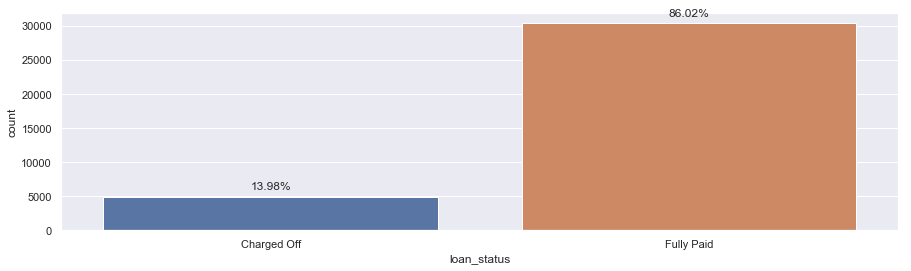

In [64]:
# Plot the variable distribution
sns.set()
plt.figure(figsize = (15,4))
g = sns.countplot(x = loan_data['loan_status'])

for p in g.patches:
    g.annotate('{:.2%}'.format(p.get_height()/len(loan_data['loan_status'])), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### __Insights:__
1. Most of the borrowers have fully paid their loans.

In this analysis, the target column is loan_status with values Fully Paid and Charged Off. Therefore, further analysis will be based on the loan status. For the easy understanding, we will derive a column 'IsDefault' from loan_status with values Defaulter for Charged Off loans and Non-Defaulter for Fully Paid. <BR><BR>

In [65]:
# Derive column with values Defaulters and Non-Defaulters

loan_data['IsDefault'] = loan_data['loan_status'].apply(lambda x: 'Non-Defaulter' if x=='Fully Paid' else 'Defaulter')
loan_data['IsDefault'].value_counts()


Non-Defaulter    30424
Defaulter         4943
Name: IsDefault, dtype: int64

Further analysis will be based on the Defaulter or Non-Defaulter.<BR>

### Univariate Analysis

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. The main purpose of univariate analysis is to describe the data and find patterns that exist within it. <BR> For Continuous variables, we will visualise using the Distribution Plot, Bar Plot and Box Plot. Also obtain quantatitve summary of data using Summary Metrics. <BR> For Categorical variables, we will visualise using Count Plot and Frequency Distribution. <BR>

In [66]:
# Define function for plotting continuous variable

def plot_continuous_variable(df, col):
    sns.set()
    
    fig,axes = plt.subplots(1,2)
    fig.set_size_inches(18,4)
    axes[0].set_title("Distribution Plot")
    sns.distplot(df[col], ax=axes[0])
    axes[1].set_title("Box Plot")
    sns.boxplot(x = df[col], y = df['IsDefault'], ax = axes[1])
    plt.show()

In [67]:
# Define function for plotting continuous variable as bins

def plot_continuous_variable_bins(col,bins,labels):
    derived = loan_data[loan_data['IsDefault'] == 'Defaulter']
    
    derived_cut = pd.cut(derived[col], bins=bins, labels=labels)
    total = pd.cut(loan_data[col], bins=bins, labels=labels)
    x = (derived_cut.value_counts()/total.value_counts())*100
    ax = x.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    i=0
    for p in ax.patches:
        ax.annotate('{:.2f}% \n Defaulters:{}'.format(p.get_height(),derived_cut.value_counts()[i]), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i = i+1

In [68]:
# Plot % of Defaulters

def plot_percentage(df,col):
    derived = df[df['IsDefault'] == 'Defaulter']
    
    derived_cut = (derived[col].value_counts()/df[col].value_counts())*100
    x = derived[col].value_counts()
    ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    i=0
    for p in ax.patches:
        ax.annotate('{:.2f}% \n Defaulters:{}'.format(p.get_height(),x.iloc[i]), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i = i+1    

#### Quantitative Variables

#### loan_amnt

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

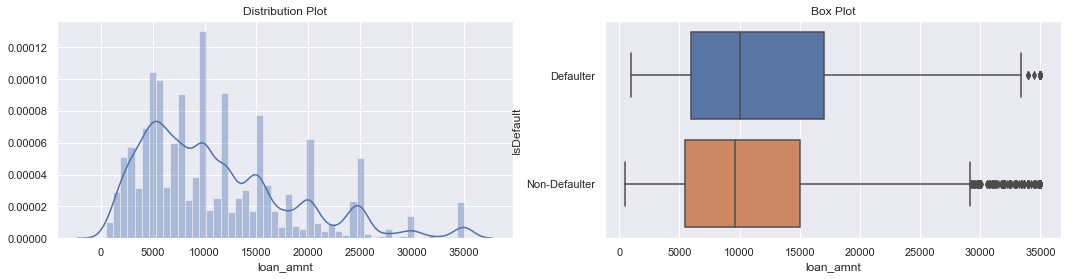

In [69]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'loan_amnt')

In [70]:
# Summary Metrics

loan_data.groupby('IsDefault')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Non-Defaulter,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


#### __Insights:__
1. The loan amount has right skewed distributions. 
2. The mean is greater than median and is right to the peak.
3. There is a spike around each 5000 boundary.
4. Most of the loan amounts are distributed between 5500 to 15000 USD.
5. Charged Off loans are slightly higher average amount than Fully Paid.

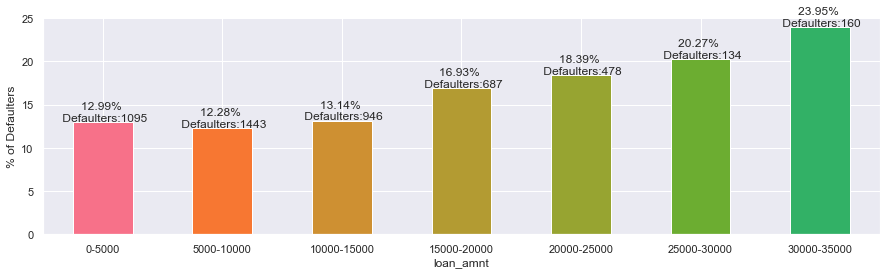

In [71]:
# Plot % of Defaulters

bins = [x for x in range(0, 36000, 5000)]
labels=[str(x)+'-'+str(x+5000) for x in range (0, 35000, 5000)]

plot_continuous_variable_bins('loan_amnt',bins,labels)

#### __Insights:__
1. The highest number of defaulters are in 5000-10000 bins, but the % of defaulters in this bin is the least with 12.28%.
2. The lowest number of defaulters are in 25000-30000 bins, but the % of defaulters in this bin is 20.27%.
3. Even though higher loan amounts are less in number, they are at a higher risk of default.

#### term

The number of payments on the loan. Values are in months and can be either 36 or 60.

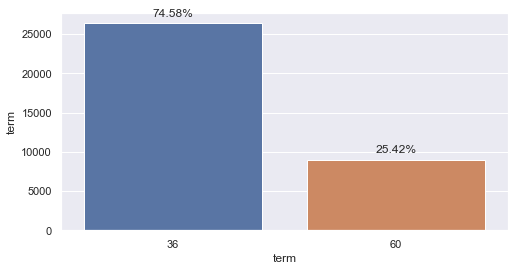

In [72]:
# Plot the variable distribution
sns.set()
plt.figure(figsize = (8,4))
g = sns.barplot(x = loan_data['term'], y = loan_data['term'].value_counts())

for p in g.patches:
    g.annotate('{:.2%}'.format(p.get_height()/len(loan_data['loan_status'])), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

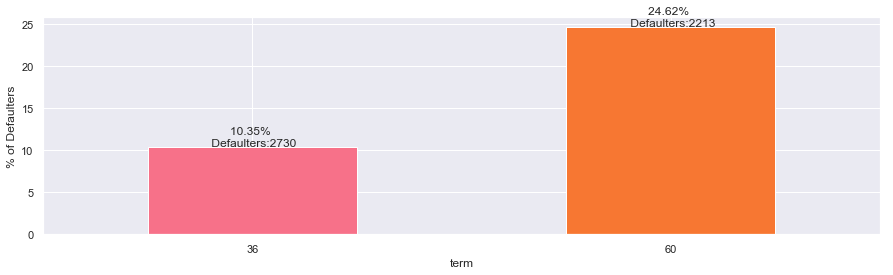

In [73]:
# Plot % of Defaulters

plot_percentage(loan_data, 'term')

In [74]:
# Summary Metrics

loan_data.groupby('IsDefault')['term'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4943.0,46.744892,11.935390,36.0,36.0,36.0,60.0,60.0
Non-Defaulter,30424.0,41.346043,9.986397,36.0,36.0,36.0,36.0,60.0


#### __Insights:__
1. Around 74.58% of the loan are of 36 months term and around 25.42% of the loan are given for 5 years.
2. The higher risk of default is for 6 years term.

#### int_rate

Interest Rate on the loan

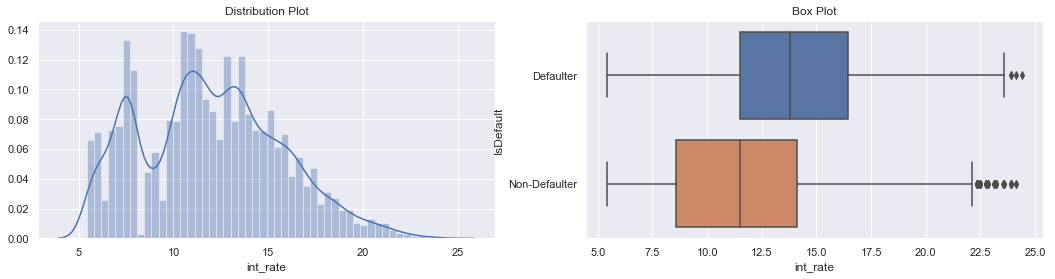

In [75]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'int_rate')

In [76]:
# Summary Metrics

loan_data.groupby('IsDefault')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Non-Defaulter,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


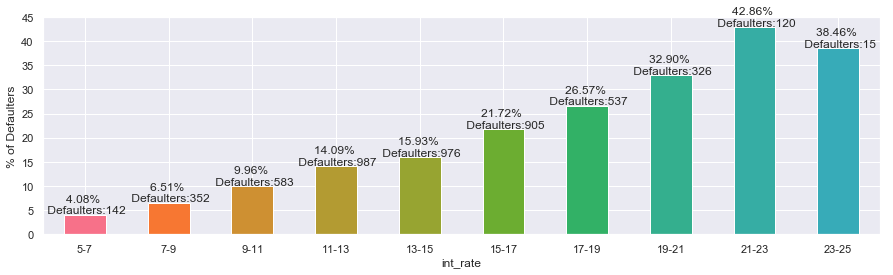

In [77]:
# Plot % of Defaulters

bins = [x for x in range(5, 26, 2)]
labels=[str(x)+'-'+str(x+2) for x in range (5, 25, 2)]

plot_continuous_variable_bins('int_rate',bins,labels)

#### __Insights:__
1. The interest rate varies from 5.4% to 24.4%.
2. The intrest rate for Defaulters is higher than for Non-Defaulters. 
3. As the risk increases the rate of interest imposed on the loan also increases.

#### installment

The monthly payment owed by the borrower if the loan originates.

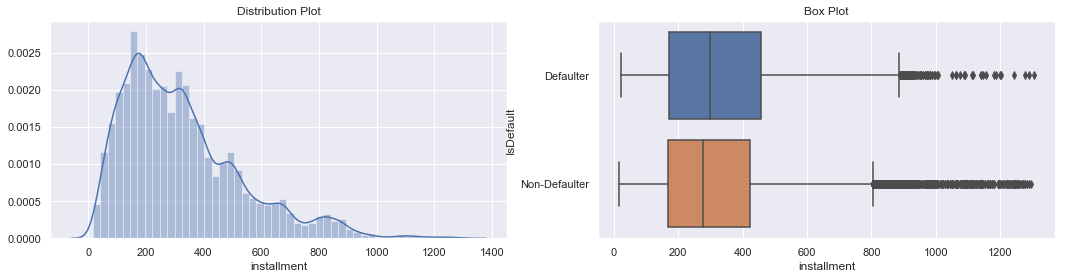

In [78]:
# Plot the variable distribution

plot_continuous_variable(loan_data,'installment')

In [79]:
# Summary Metrics

loan_data.groupby('IsDefault')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Non-Defaulter,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


#### __Insights:__
1. Most of the installments amount of Defaulters varies between 172.44 and 458.32 USD with median of 298 USD.
2. It has a right skewed distribution.
3. The installment amount is higher for Defaulters.

#### emp_length

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

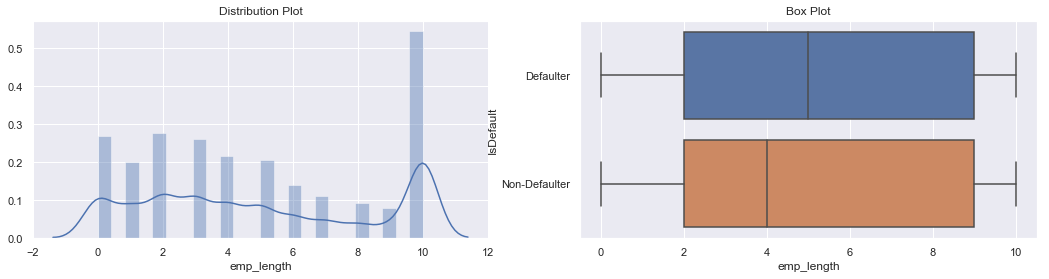

In [80]:
# Plot the variable distribution

plot_continuous_variable(loan_data,'emp_length')

In [81]:
# Summary Metrics

loan_data.groupby('IsDefault')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4943.0,5.155978,3.573383,0.0,2.0,5.0,9.0,10.0
Non-Defaulter,30424.0,4.955529,3.530349,0.0,2.0,4.0,9.0,10.0


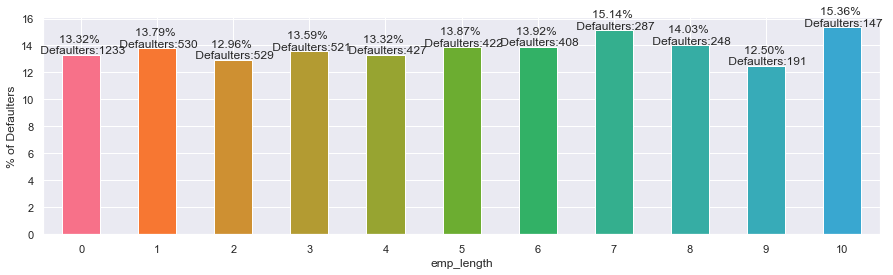

In [82]:
# Plot % of Defaulters

plot_percentage(loan_data, 'emp_length')

#### __Insights:__
1. Most of the loan takers have employment length more than 10 years.
2. Most of the employment length of loan takers varies from 2 to 9 years.
3. The higher risk of default is for borrowers with employment length above 10 years, though number of defaulters are less.

#### annual_inc

The self-reported annual income provided by the borrower during registration.

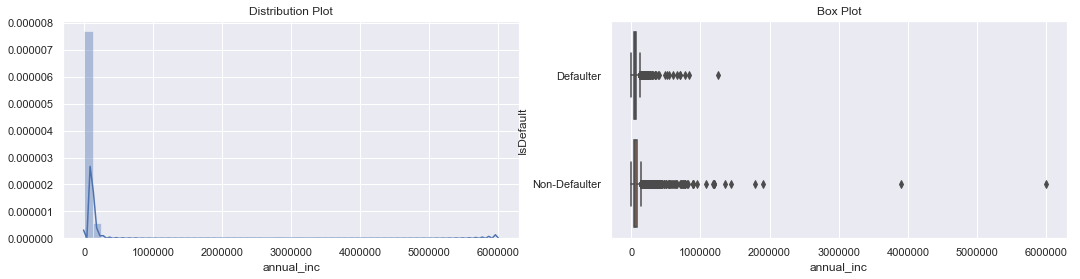

In [83]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'annual_inc')

In [84]:
# Summary Metrics

loan_data['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

#### __Insights:__
1. The annual income of the borrowers range from 4,000 to 6,000,000 USD.
2. Median of annual income is around 60,000 USD.
3. Most loan takers have an annual income less than 115000 USD.

It is found that annual_inc (annual income provided by the borrower during registration) column have outliers. The median value is 60,000 and maximum value is ‭6,000,000‬, which means maximum value is more than 160 times median value. Therefore we need to remove the outliers. Our approach is to remove the outlier points by eliminating any points that were above (Mean + 2 ∗ SD) and any points below (Mean - 2 ∗ SD).

In [85]:
low = loan_data['annual_inc'].mean() - (2*loan_data['annual_inc'].std())
high = loan_data['annual_inc'].mean() + (2*loan_data['annual_inc'].std())
loan_data = loan_data.loc[(loan_data['annual_inc'] > low) & (loan_data['annual_inc'] < high)]

In [86]:
loan_data['annual_inc'].describe()

count     34773.000000
mean      64721.030072
std       32407.473825
min        4000.000000
25%       41000.000000
50%       58650.000000
75%       80000.000000
max      197004.000000
Name: annual_inc, dtype: float64

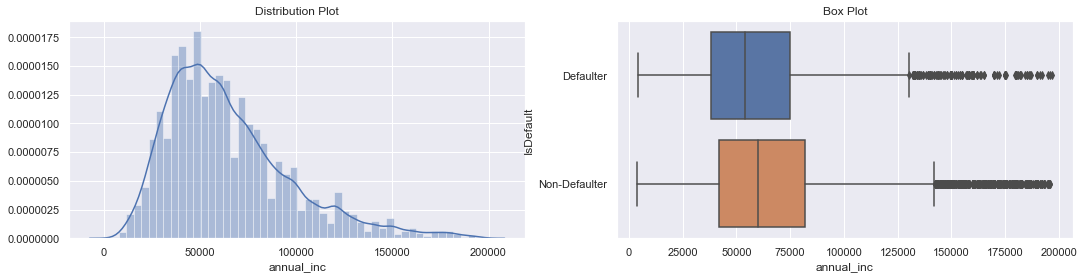

In [87]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'annual_inc')

In [88]:
# Summary Metrics

loan_data.groupby('IsDefault')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,59917.613432,30941.516441,4080.0,38244.665,54000.0,75000.0,197004.0
Non-Defaulter,29886.0,65506.491395,32574.109902,4000.0,42000.000,60000.0,82000.0,196000.0


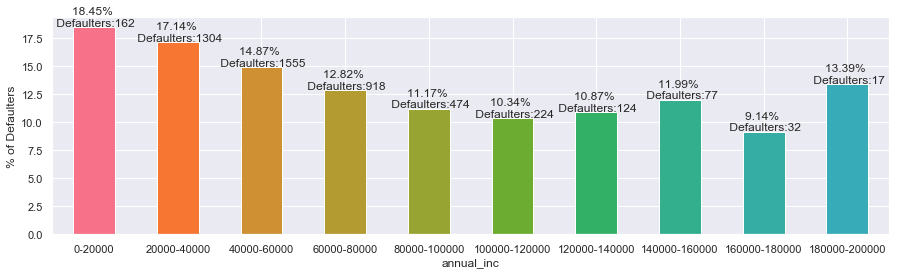

In [89]:
# Plot % of Defaulters

bins = [x for x in range(0, 210000, 20000)]
labels=[str(x)+'-'+str(x+20000) for x in range (0, 200000, 20000)]

plot_continuous_variable_bins('annual_inc',bins,labels)

#### __Insights:__
1. The percentage of defaulters are higher for annual incomes upto 20000 and the number of defaulters are 162.
2. The number of defaulters are less for 160000 to 180000 USD.
3. Higher risk of default is for borrowers with less annual income.

#### dti

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

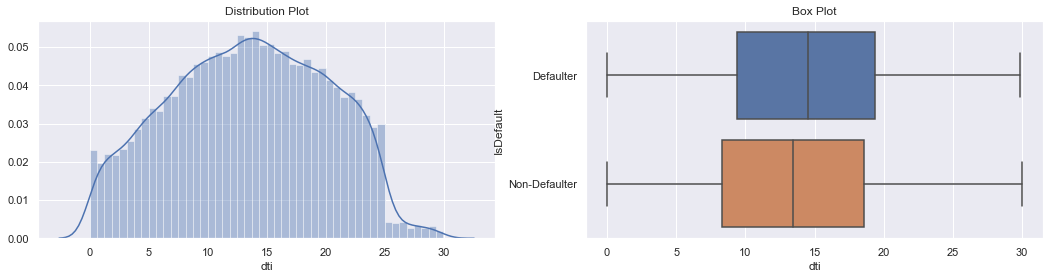

In [90]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'dti')

In [91]:
# Summary Metrics

loan_data.groupby('IsDefault')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,14.203902,6.516484,0.0,9.40,14.50,19.38,29.85
Non-Defaulter,29886.0,13.367348,6.632808,0.0,8.28,13.45,18.60,29.99


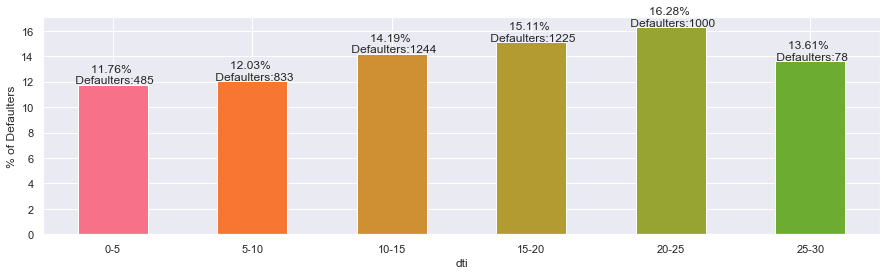

In [92]:
# Plot % of Defaulters

bins = [x for x in range(0, 31, 5)]
labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)]

plot_continuous_variable_bins('dti',bins,labels)

#### __Insights:__
1. The dti value ranges from 9.40 to 29.85 for defaulters.
2. Median of dti is around 14.50 for defaulters.
3. Higher percentage of defaulters are having ratio higher than 20.
4. The risk of default is higher for higher dti.

#### delinq_2yrs

The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years

In [93]:
# Check the value count as percentage

loan_data['delinq_2yrs'].value_counts(normalize = True)*100

0     89.221522
1      8.285164
2      1.705346
3      0.529146
4      0.146666
5      0.060392
6      0.028758
7      0.011503
8      0.005752
11     0.002876
9      0.002876
Name: delinq_2yrs, dtype: float64

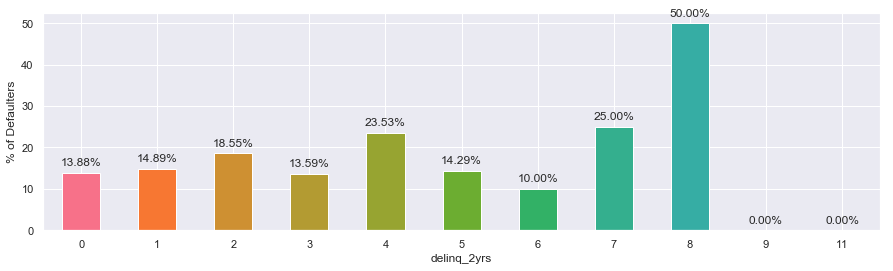

In [94]:
# Plot % of Defaulters

derived = loan_data[loan_data['IsDefault'] == 'Defaulter']
    
derived_cut = (derived['delinq_2yrs'].value_counts()/loan_data['delinq_2yrs'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('delinq_2yrs')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### __Insights:__
1. The values ranges between 0 and 11 with most loan takers having value of 0.
2. The risk of default is for higher values.

#### inq_last_6mths

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [95]:
# Check the value count as percentage

loan_data['inq_last_6mths'].value_counts(normalize = True)*100

0    48.695827
1    27.636385
2    14.701061
3     7.583470
4     0.773589
5     0.345095
6     0.152417
7     0.086274
8     0.025882
Name: inq_last_6mths, dtype: float64

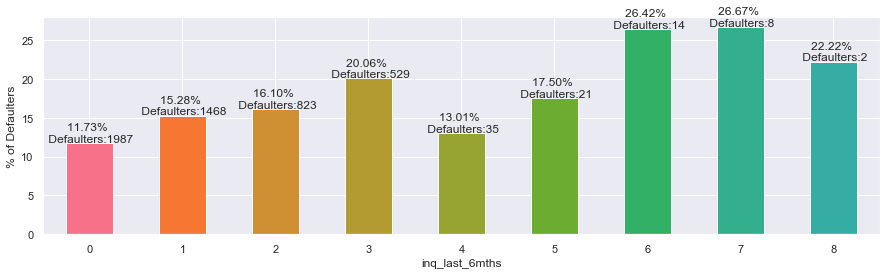

In [96]:
# Plot % of Defaulters

plot_percentage(loan_data, 'inq_last_6mths')

#### __Insights:__
1. The values ranges between 0 and 8 with most loan takers having value of 0. That is, most of the borrowers do not make any inquiry.
2. Borrowers with inquiries more than once have the higher risk of default.

#### open_acc

The number of open credit lines in the borrower’s credit file.

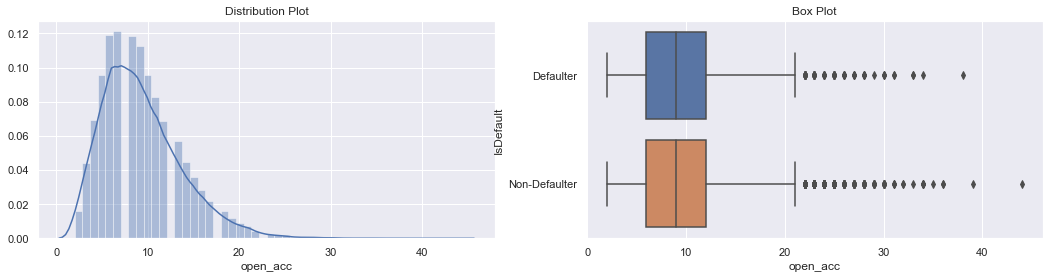

In [97]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'open_acc')

#### __Insights:__
1. The number of open accounts for borrowers range from 2 to 12, with median of 9.
2. From the box plot, it is inferred that there is no significant change between Defaulters and Non-Defaulters.

#### pub_rec

Number of derogatory public records

In [98]:
# Check the value count as percentage

loan_data['pub_rec'].value_counts(normalize = True)*100

0    94.725793
1     5.121790
2     0.126535
3     0.020131
4     0.005752
Name: pub_rec, dtype: float64

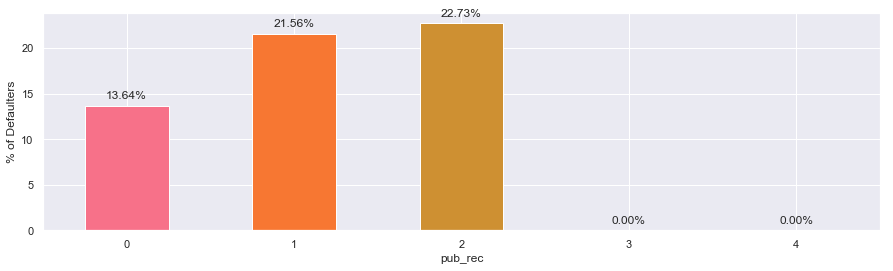

In [99]:
# Plot % of Defaulters

derived = loan_data[loan_data['IsDefault'] == 'Defaulter']
    
derived_cut = (derived['pub_rec'].value_counts()/loan_data['pub_rec'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('pub_rec')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### __Insights:__
1. Most of the borrowers have no Public derogatory records.
2. Defaulters with derogatory public records more than 1 have higher risk of default.

#### revol_bal

Total credit revolving balance

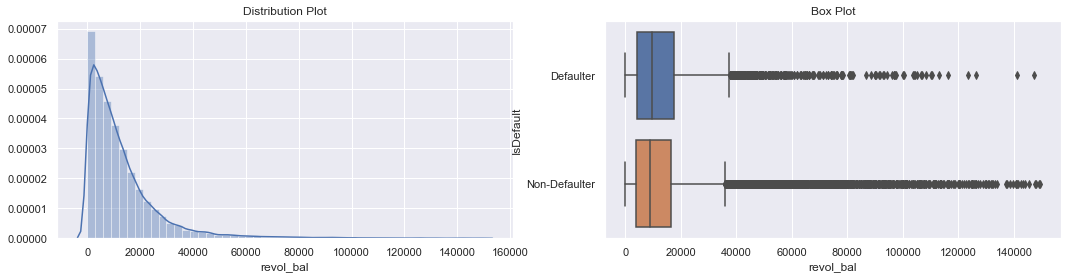

In [100]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'revol_bal')

In [101]:
# Summary Metrics

loan_data.groupby('IsDefault')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,13481.507878,14569.407476,0.0,4195.0,9481.0,17575.50,147365.0
Non-Defaulter,29886.0,12935.732249,14987.388423,0.0,3676.0,8741.0,16636.75,149527.0


#### __Insights:__
1. The revolving balance varies from min 0 to max of 150,000 USD. The median revol_bal is of around 9000 USD.
2. It has a right skewed distribution.
3. There is no large difference in revolving balance mean for Defaulters and Non-Defaulters.

#### revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

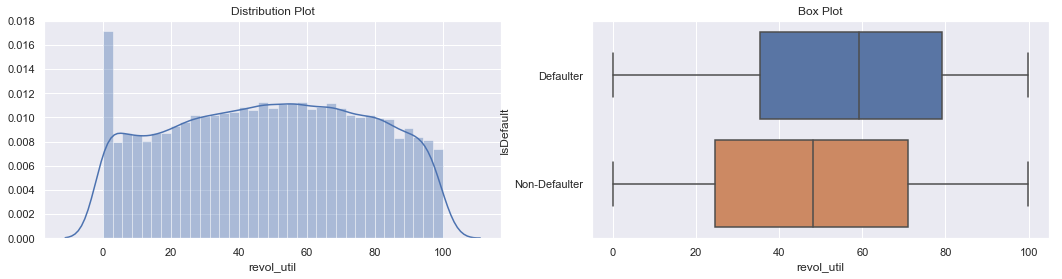

In [102]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'revol_util')

In [103]:
# Summary Metrics

loan_data.groupby('IsDefault')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,56.049364,27.665576,0.0,35.25,59.2,79.2,99.9
Non-Defaulter,29886.0,47.970875,28.111029,0.0,24.60,48.2,71.1,99.9


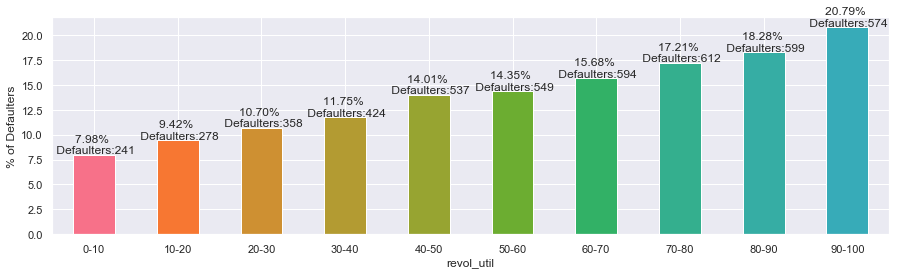

In [104]:
# Plot % of Defaulters

bins = [x for x in range(0, 101, 10)]
labels=[str(x)+'-'+str(x+10) for x in range (0, 100, 10)]

plt.figure(figsize=(25,5))
ax = plot_continuous_variable_bins('revol_util',bins,labels)

#### __Insights:__
1. The average revolving line utilization rate is 56% for Defaulters.
2. Revolving line utilization rate of 90% to 100% has the highest risk of default.
3. Revolving line utilization rate having less than 10% has the least risk of default.

#### total_acc

The total number of credit lines currently in the borrower’s credit file

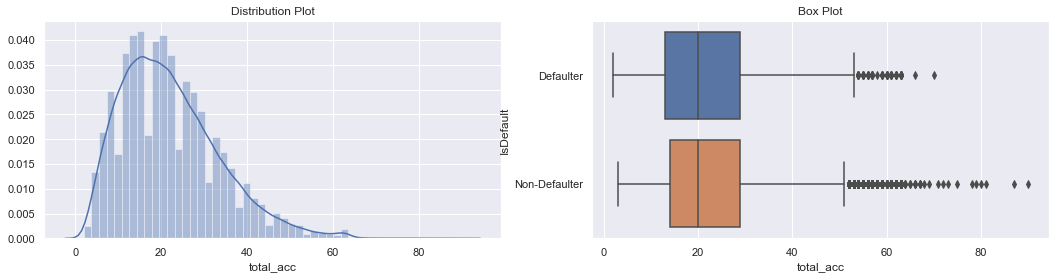

In [105]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'total_acc')

In [106]:
# Summary Metrics

loan_data.groupby('IsDefault')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,21.625333,11.365661,2.0,13.0,20.0,29.0,70.0
Non-Defaulter,29886.0,22.142408,11.328289,3.0,14.0,20.0,29.0,90.0


#### __Insights:__
1. The total number of accounts for borrowers range from 2 to 70, with an average of 22 for Defaulters.
2. There is no significant difference between the defaulter and Non-Defaulter credit lines.

#### pub_rec_bankruptcies

Number of public record bankruptcies

In [107]:
# Check the value counts as percentage

loan_data['pub_rec_bankruptcies'].value_counts(normalize = True)*100

0.0    95.809968
1.0     4.175654
2.0     0.014379
Name: pub_rec_bankruptcies, dtype: float64

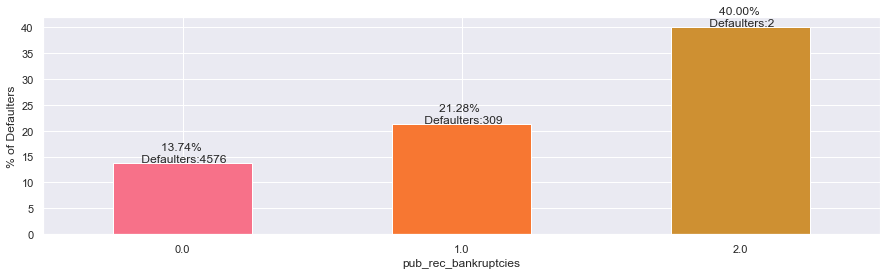

In [108]:
# Plot % of Defaulters

plot_percentage(loan_data, 'pub_rec_bankruptcies')

#### __Insights:__
1. Most of the borrowers have no Public record bankruptcies.
2. Higher risk of default is for borrowers with higher Public record bankruptcies.

#### Derived Metrics

#### credit_age

In [109]:
# Derive the credit age from the variable 'earliest_cr_line'

from datetime import datetime

loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line)

dttoday = datetime.now().strftime('%Y-%m-%d')
# There is a better way to do this :) 
loan_data['credit_age'] = loan_data.earliest_cr_line.apply(lambda x: round((
        np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365))


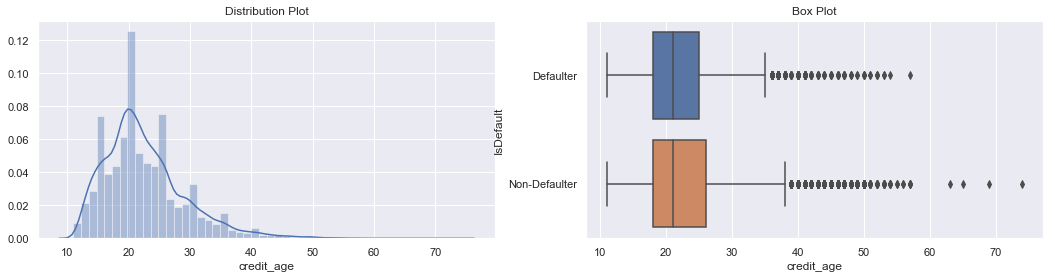

In [110]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'credit_age')

In [111]:
# Summary Matrix

loan_data.groupby('IsDefault')['credit_age'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,22.243094,6.456143,11.0,18.0,21.0,25.0,57.0
Non-Defaulter,29886.0,22.599511,6.575316,11.0,18.0,21.0,26.0,74.0


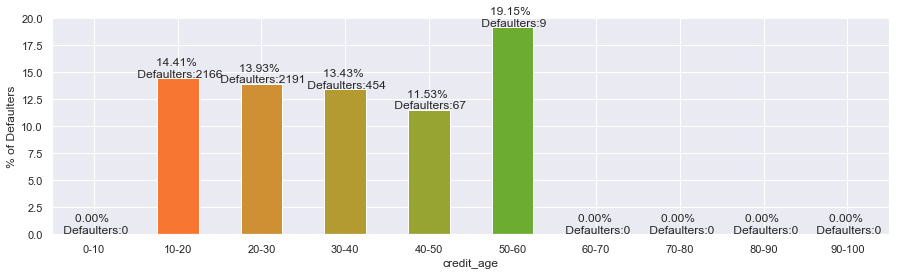

In [112]:
# Plot % of Defaulters

bins = [x for x in range(0, 101, 10)]
labels=[str(x)+'-'+str(x+10) for x in range (0, 100, 10)]

plot_continuous_variable_bins('credit_age',bins,labels)

#### __Insights:__
1. Most of the borrowers have good credit age.
2. Higher risk of default is for borrowers with large credit age. That is the borrowers are older people and there may be chances of death or not able to pay back.
3. When comparing other credit ages, the higher risk of default is for lower credit ages, like 10-20.

#### income_to_loan_amount

In [113]:
# Derive income_to_loan_amount variable as the ratio  of annual income and loan amount

loan_data['income_to_loan_amount'] = round(loan_data['annual_inc'] / loan_data['loan_amnt'])

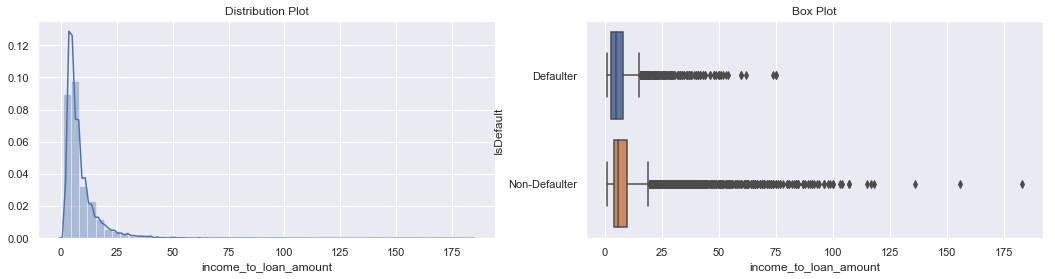

In [114]:
# Plot the variable distribution

plot_continuous_variable(loan_data, 'income_to_loan_amount')

In [115]:
# Summary Metrics

loan_data.groupby('IsDefault')['income_to_loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
IsDefault,,,,,,,,
Defaulter,4887.0,7.229793,6.785421,1.0,3.0,5.0,8.0,75.0
Non-Defaulter,29886.0,8.798233,8.451092,1.0,4.0,6.0,10.0,183.0


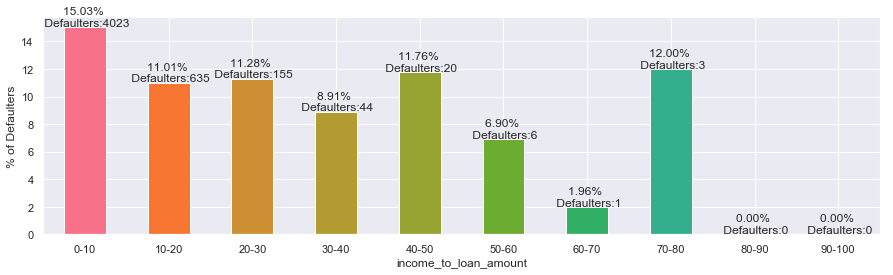

In [116]:
# Plot % of Defaulters

bins = [x for x in range(0, 101, 10)]
labels=[str(x)+'-'+str(x+10) for x in range (0, 100, 10)]

plot_continuous_variable_bins('income_to_loan_amount',bins,labels)

#### __Insights:__
1. Most of the borrowers have good annual income to loan amount ratio 0 and 25.
2. Highest number of defaulters and the highest percentage of defaulters are having annual income to loan amount ratio of 0 to 10.
3. Higher risk of default is for borrowers with low annual income to loan amount ratio.

#### Qualitative Variables

In [117]:
# Plot the categorical variable

def plot_categorical_variables(df,col):
    ax = sns.countplot(x = col, data = df)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        

In [118]:
# Plot % of Defaulters

def plot_percentage_categorical(df,col):
    derived = df[df['IsDefault'] == 'Defaulter']
    
    derived_cut = (derived[col].value_counts()/df[col].value_counts())*100
    x = derived[col].value_counts().sort_index()
    ax = derived_cut.sort_index().plot.bar(rot=0,color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    i=0
    for p in ax.patches:
        ax.annotate('{:.2f}% \n Defaulters:{}'.format(p.get_height(),x.iloc[i]), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i = i+1    

#### purpose
LC assigned loan grade

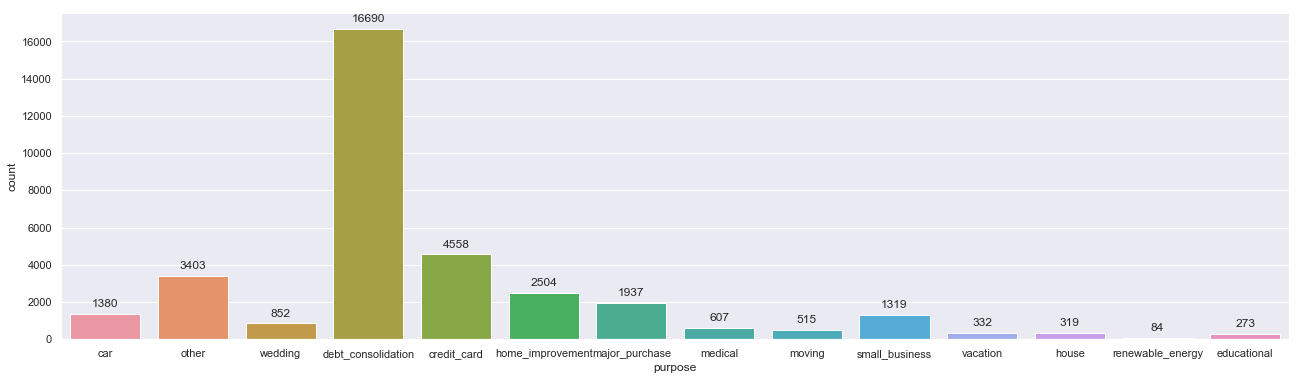

In [119]:
# Plot the variable distribution

plt.figure(figsize=(22, 6))
plot_categorical_variables(loan_data, 'purpose')

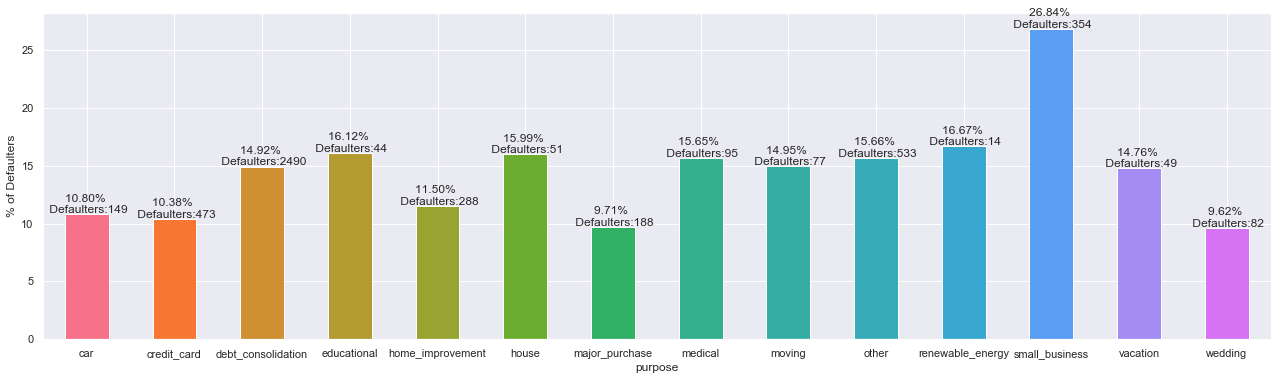

In [120]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
plot_percentage_categorical(loan_data, 'purpose')

#### __Insights:__
1. Most of the borrowers take loan to clear off some other debts.
2. Highest number of defaulters are for 'debt_consolidation' and the highest percentage of defaulters are for small_business.
3. The top 5 types of loans based on purpose: debt_consolidation, credit card, home improvement, major purchase and small business.

#### grade
LC assigned loan grade.

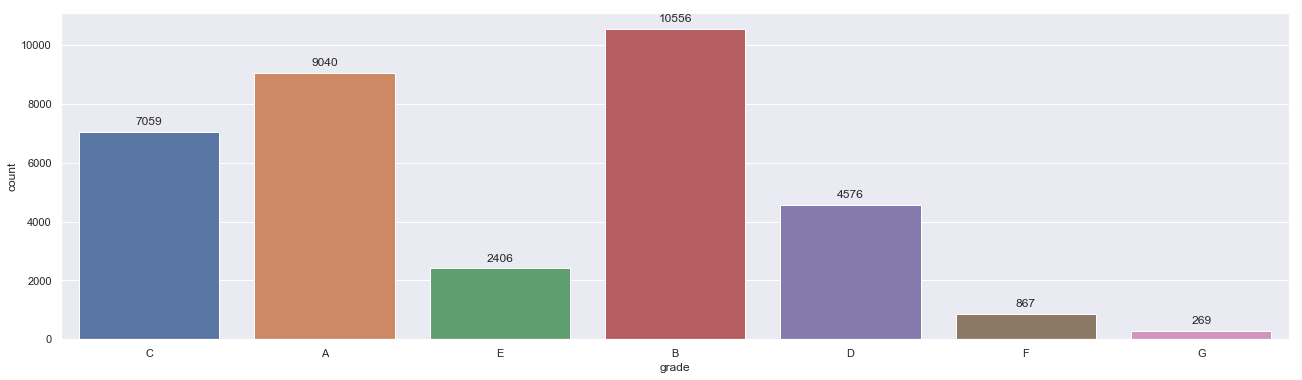

In [121]:
# Plot the variable distribution

plt.figure(figsize=(22, 6))
plot_categorical_variables(loan_data, 'grade')

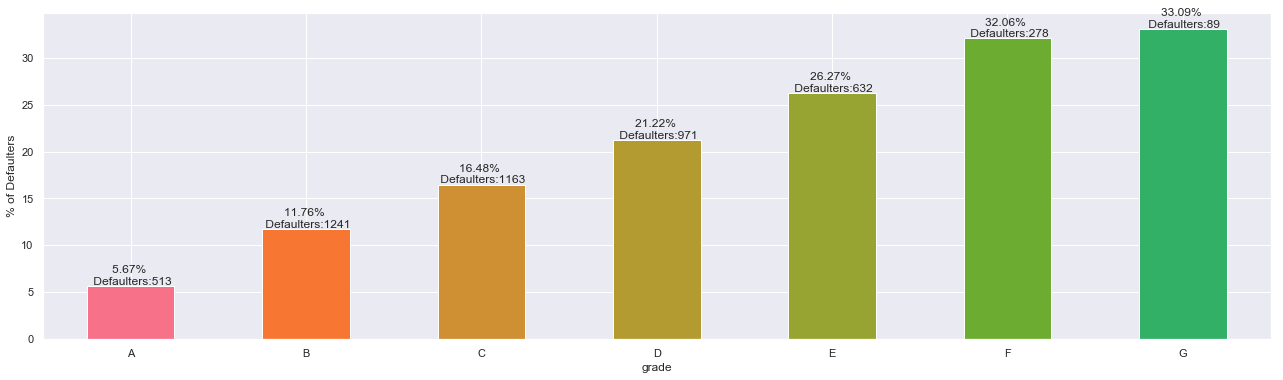

In [122]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
plot_percentage_categorical(loan_data, 'grade')

#### __Insights:__
1. Most number of Defaults happen in Grade 'B'. This probably could attribute to having the most number of loans appearing in this grade as this is 10-13% interest rate range.
2. But the likelihood of defaulting is highest in Grade 'G', this probably could attribute to having the highest interest rates and most risky section for lenders.

#### subgrade
LC assigned loan subgrade.

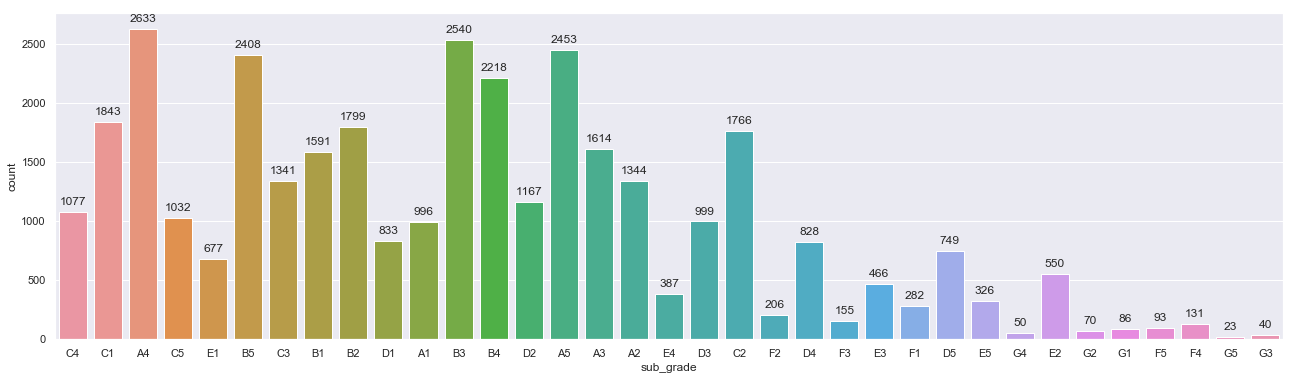

In [123]:
# Plot the variable distribution

plt.figure(figsize=(22, 6))
plot_categorical_variables(loan_data, 'sub_grade')

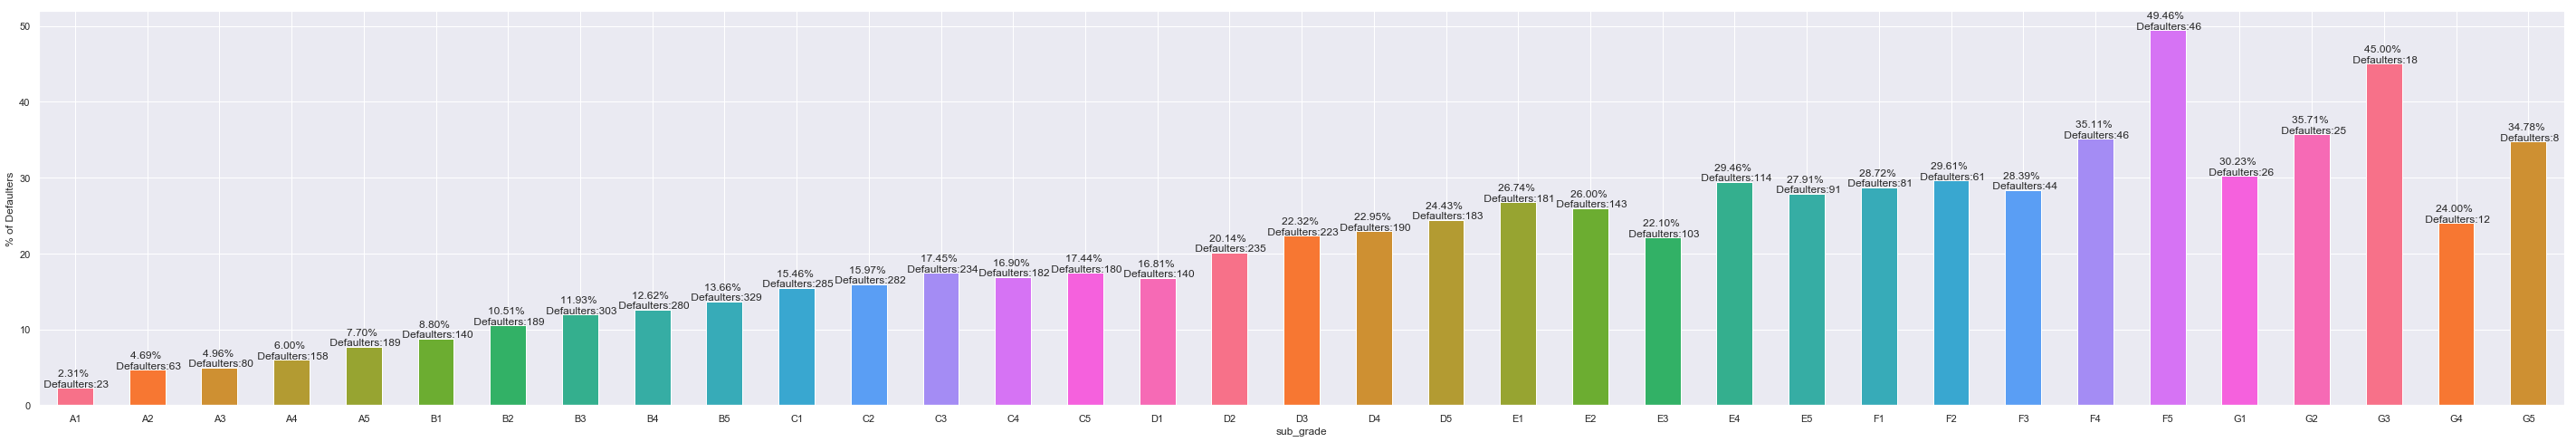

In [124]:
# Plot % of Defaulters

plt.figure(figsize=(50, 8))
plot_percentage_categorical(loan_data, 'sub_grade')

#### __Insights:__
1. Most number of Defaults happen in Sub Grade 'B5'. This probably could attribute to having the most number of loans appearing in this grade as this is 13% interest rate range.
2. But the likelihood of defaulting is highest in Sub Grade 'F5', this probably could attribute to F5 being the last sub grade in 'F', applicants try to be here to get the maximum loan possible and also to avoid extra scrutiny of 'G' grade.
3. People who pay back their loans fully, they are mostly in sub grade of 'A5'.

#### home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

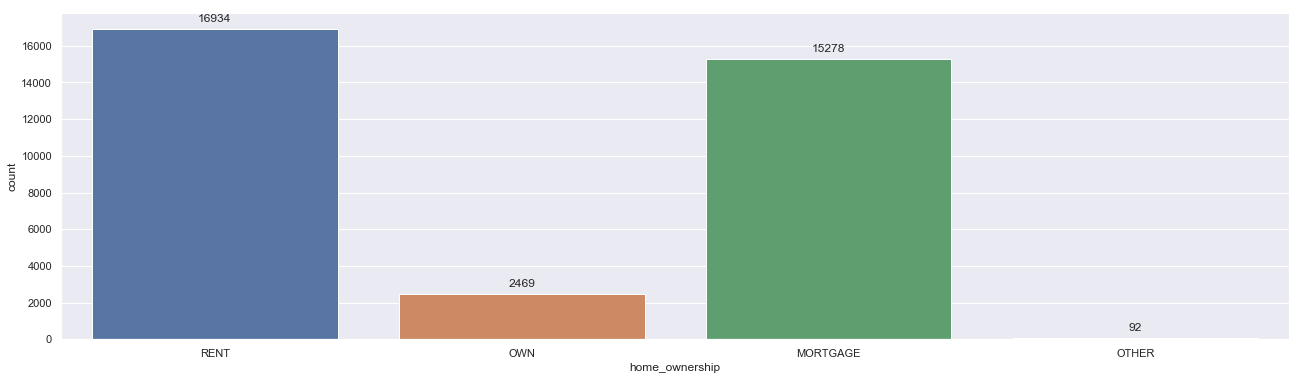

In [125]:
# Plot the variable distribution

plt.figure(figsize=(22, 6))
plot_categorical_variables(loan_data, 'home_ownership')

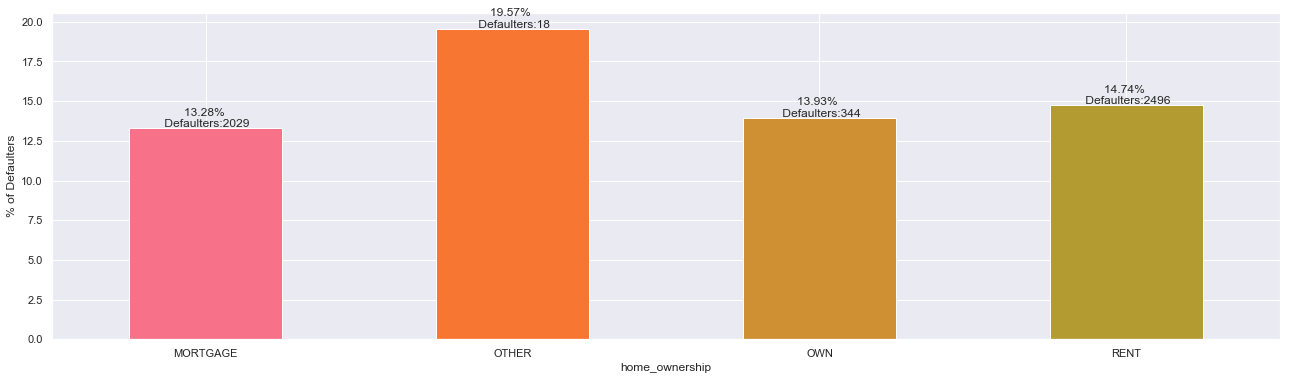

In [126]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
plot_percentage_categorical(loan_data, 'home_ownership')

#### __Insights:__
1. Most number of Defaults happen in with applicants living in 'Rental' properties. This probably could attribute to having the most number of loans appearing in this category. People living on rent tend to take more loans.
2. But the likelihood of defaulting is highest in 'Others' which is 'Any and None', this probably could attribute to people living anywhere or nowhere, do not have necessary financial stability to repay the loans.

#### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified

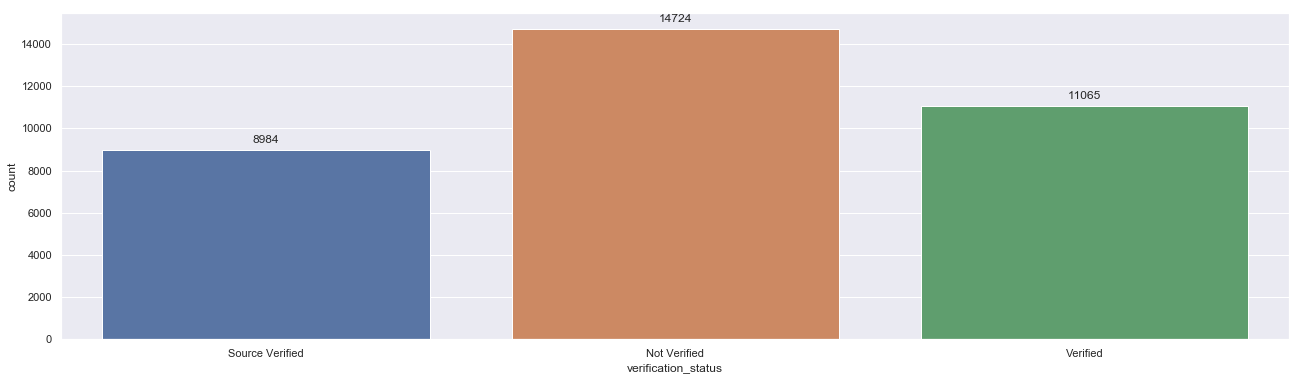

In [127]:
# Plot the variable distribution

plt.figure(figsize=(22, 6))
plot_categorical_variables(loan_data, 'verification_status')

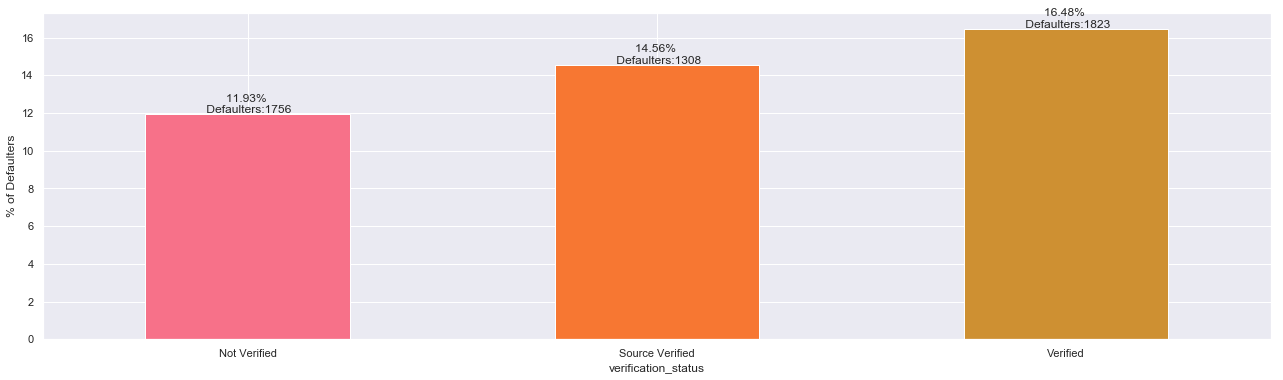

In [128]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
plot_percentage_categorical(loan_data, 'verification_status')

#### __Insights:__
1. Most number of Defaults and the likelihood of defaulting is highest in Income and Source Verified combined.
2. Loans without income verification have had lower default rates than those that were income verified or source of income verified.

#### addr_state
The state provided by the borrower in the loan application

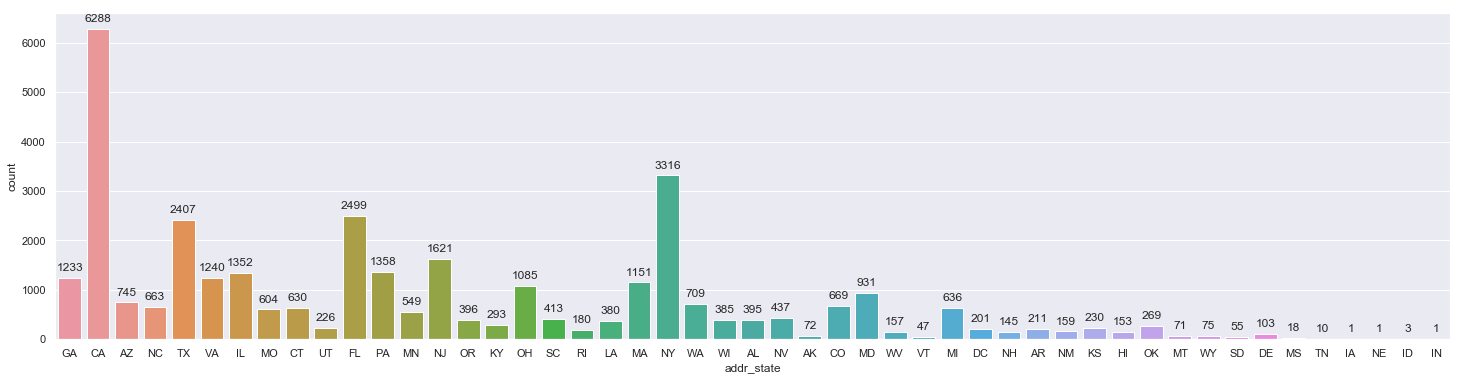

In [129]:
# Plot the variable distribution

plt.figure(figsize=(25, 6))
plot_categorical_variables(loan_data, 'addr_state')

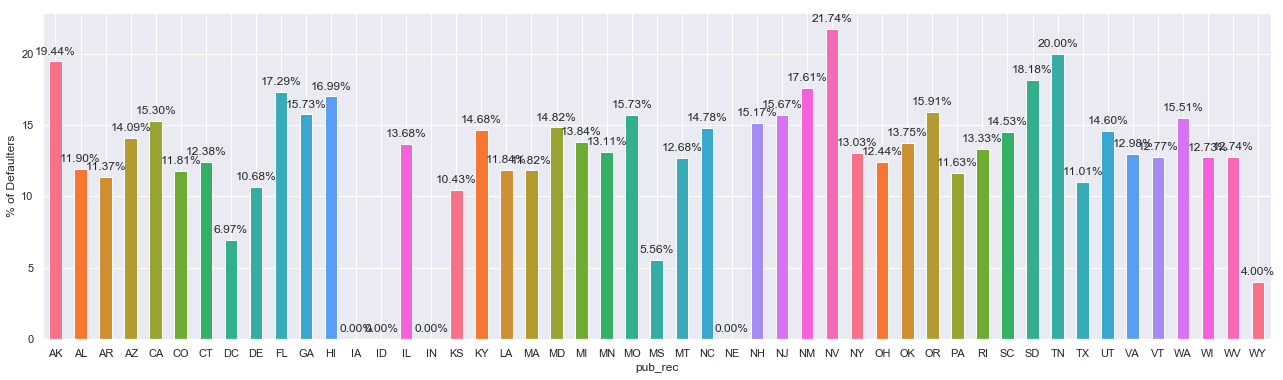

In [130]:
# Plot % of Defaulters

derived = loan_data[loan_data['IsDefault'] == 'Defaulter']
    
derived_cut = (derived['addr_state'].value_counts()/loan_data['addr_state'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(22,6),color=sns.color_palette('husl', 16))
ax.set_xlabel('pub_rec')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### __Insights:__
1. Most number of Defaults happen in 'California'. This probably could attribute to having the most population among all the states of USA.
2. But the likelihood of defaulting is highest in 'Nevada', this probably could attribute to having a gambling mindset. 
3. 0 % of default in ID, IA & NE states are due to that fact that lendingclub do not provide any consumer finance services in these states.

### Driver Variables
As per our univariate analysis, these below variables are looking interesting for bivariate analysis

<br>Loan Amount
<br>Purpose
<br>Home Ownership
<br>Purpose along with State
<br>Sub-Grade
<br>Term
<br>Annual Income
<br>DTI
<br>Public Record Bankruptcies
<br>Credit Age
<br>Employment Length

### Bivariate Analysis

Bivariate finds out the relationship between two variables.We can perform Bivariate for Categorical and Categorical, Categorical and Continuous and Continuous and Continuous combinations.

#### Correlation Matrix Heatmap

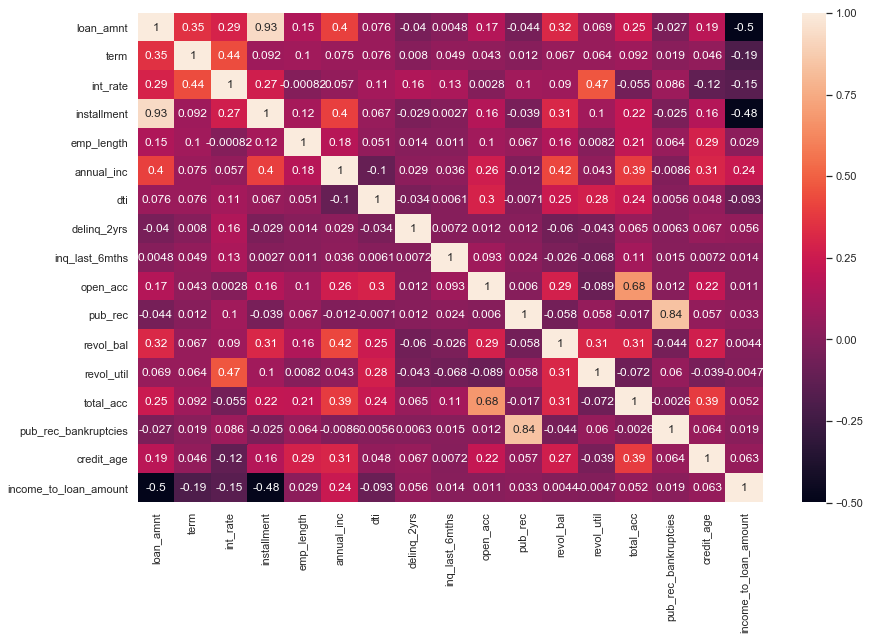

In [131]:
# Correlation Matrix

fig, axes = plt.subplots(figsize=(14, 9))
loan_data_correlation = loan_data.corr()
sns.heatmap(loan_data_correlation, xticklabels=loan_data_correlation.columns,
            yticklabels=loan_data_correlation.columns,annot= True)

In [132]:
# Define function for plotting categorical and numerical variables

def plot_categorical_numerical_bivariate(df,col_x,col_y,hue = 'IsDefault'):
    fig, axes = plt.subplots(figsize = (15,5))
    sns.barplot(x=col_x, y=col_y, hue = hue, data=loan_data, ci=None)

#### Loan Amount, Term over IsDefault

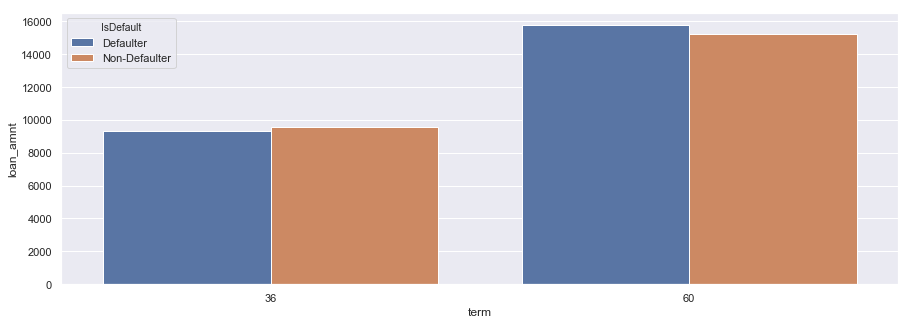

In [133]:
# Plot loan_amt and term on IsDefault

plot_categorical_numerical_bivariate(loan_data, 'term', 'loan_amnt')

#### __Insights:__
1. Loan takers prefer longer term for large loan amount.
2. The assumption made in univariate analysis is now clear. Higher loan amount with longer terms has more defaulters.

#### Loan Amount, Employment Length over IsDefault

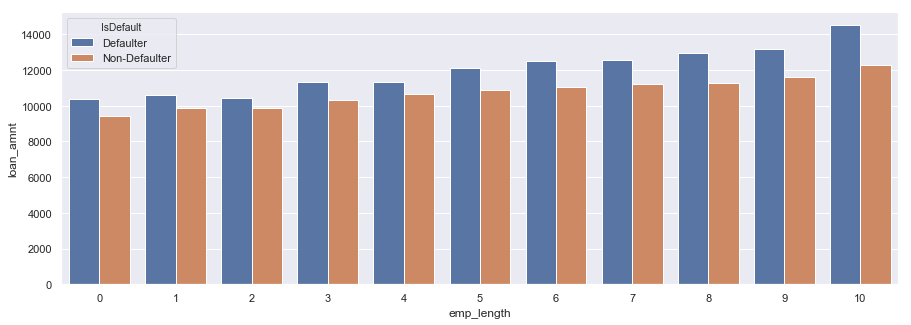

In [134]:
# Plot loan_amt and emp_length over IsDefault

plot_categorical_numerical_bivariate(loan_data, 'emp_length', 'loan_amnt')

#### __Insights:__
1. Large loan amounts are taken by borrowers with more than 10 years of employment length.
1. Higher loan amount with more than 10 years of employment length has more defaulters.

#### Loan Amount and Annual Income

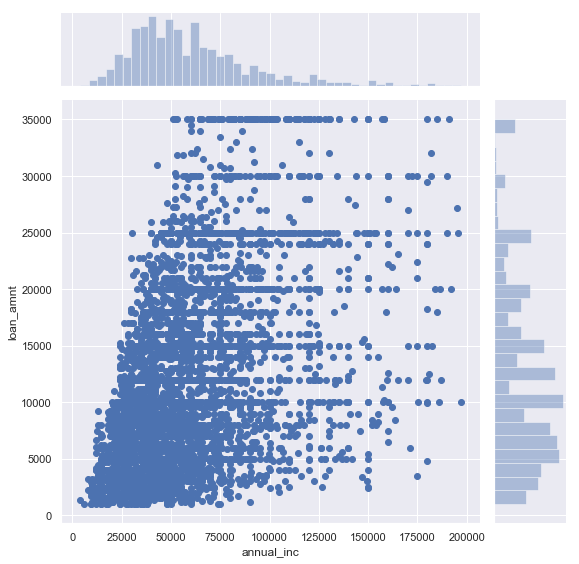

In [135]:
# Analysis using annual income and loan amount of defualters

derived = loan_data[loan_data['IsDefault'] == 'Defaulter']

# Plot 'annual_inc' and 'loan_amnt'

sns.jointplot(x = 'annual_inc', y = 'loan_amnt', data = derived, height=8)

#### __Insights:__
1. Borrowers with annual income less than 50000 USD take higher loan amounts.
2. Based on the univariate analysis of loan amount and annual income and the bivariate analysis based on defaulters, we can conclude that the risk of default is for borrowers whose annual income is less and take large loan amount.

#### Loan Amount and DTI

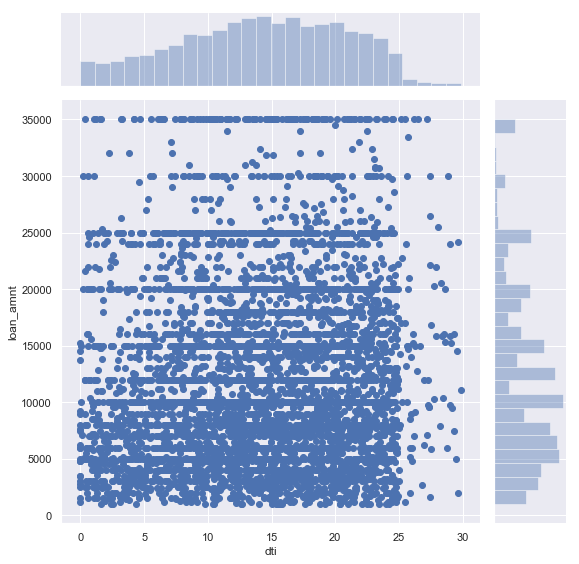

In [136]:
# Plot 'dti' and 'loan_amnt'

sns.jointplot(x = 'dti', y = 'loan_amnt', data = derived, height = 8)


#### __Insights:__
1. Based on the univariate analysis of loan amount and dti and the bivariate analysis based on defaulters, we can conclude that the risk of default is for borrowers whose dti is high and take large loan amount.

#### Loan Amount, Public Record Bankruptcies over IsDefault

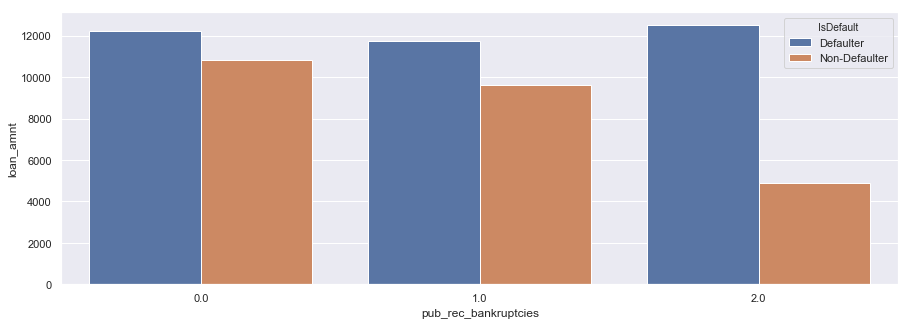

In [137]:
# Plot loan_amt and pub_rec_bankruptcies over IsDefault

plot_categorical_numerical_bivariate(loan_data, 'pub_rec_bankruptcies', 'loan_amnt')

#### __Insights:__
1. Borrowers with large loan amount and 0 public record bankruptcies are non-defaulters.
1. Whereas borrowers with large loan amount and have public record bankruptcies are the defaulters.

#### Loan Amount, Credit Age over IsDefault

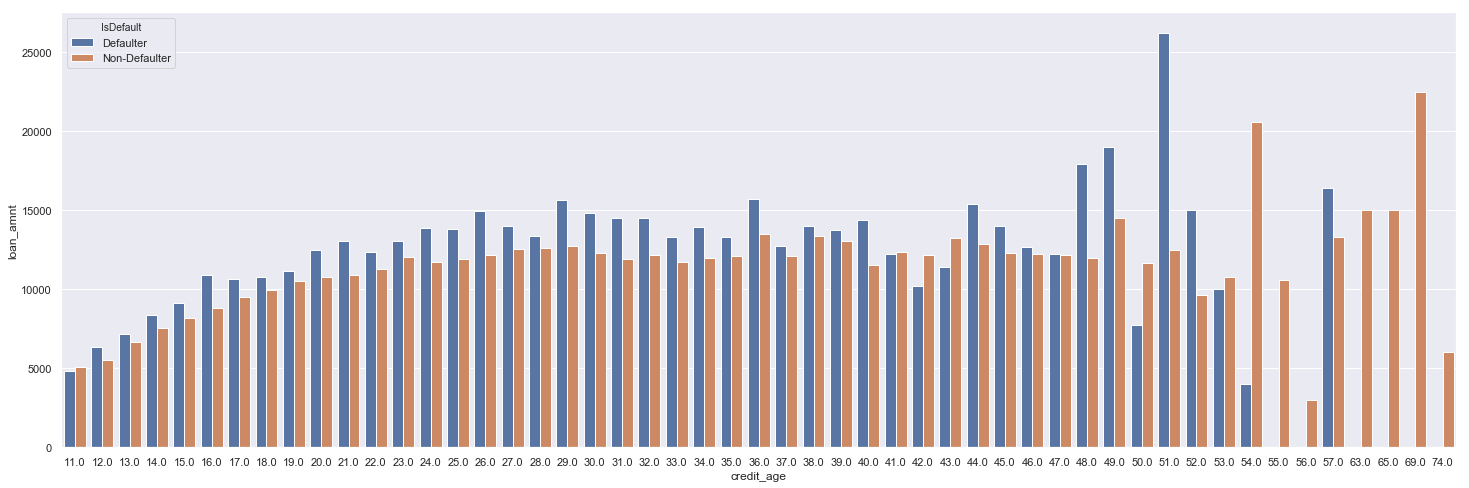

In [138]:
# Plot loan_amt and credit_age over IsDefault

fig, axes = plt.subplots(figsize = (25,8))
sns.barplot(x=  'credit_age', y = 'loan_amnt', hue = 'IsDefault', data = loan_data, ci = None)

#### __Insights:__
1. Borrowers with large loan amount and high credit age are non-defaulters.
1. Whereas borrowers with low credit age tend to be defaulters.

In [139]:
# plot multivariate plot with x or y as numerical data, other one to be categorical and then hue also to be categorical
def plot_categorical_numerical_multivariate(df, col1, col2, col3):
    plt.figure(figsize=(30,10))
    sns.boxplot(data =df, x=col1, y=col2, hue =col3)

#### Purpose Vs Loan Amount Over IsDefault

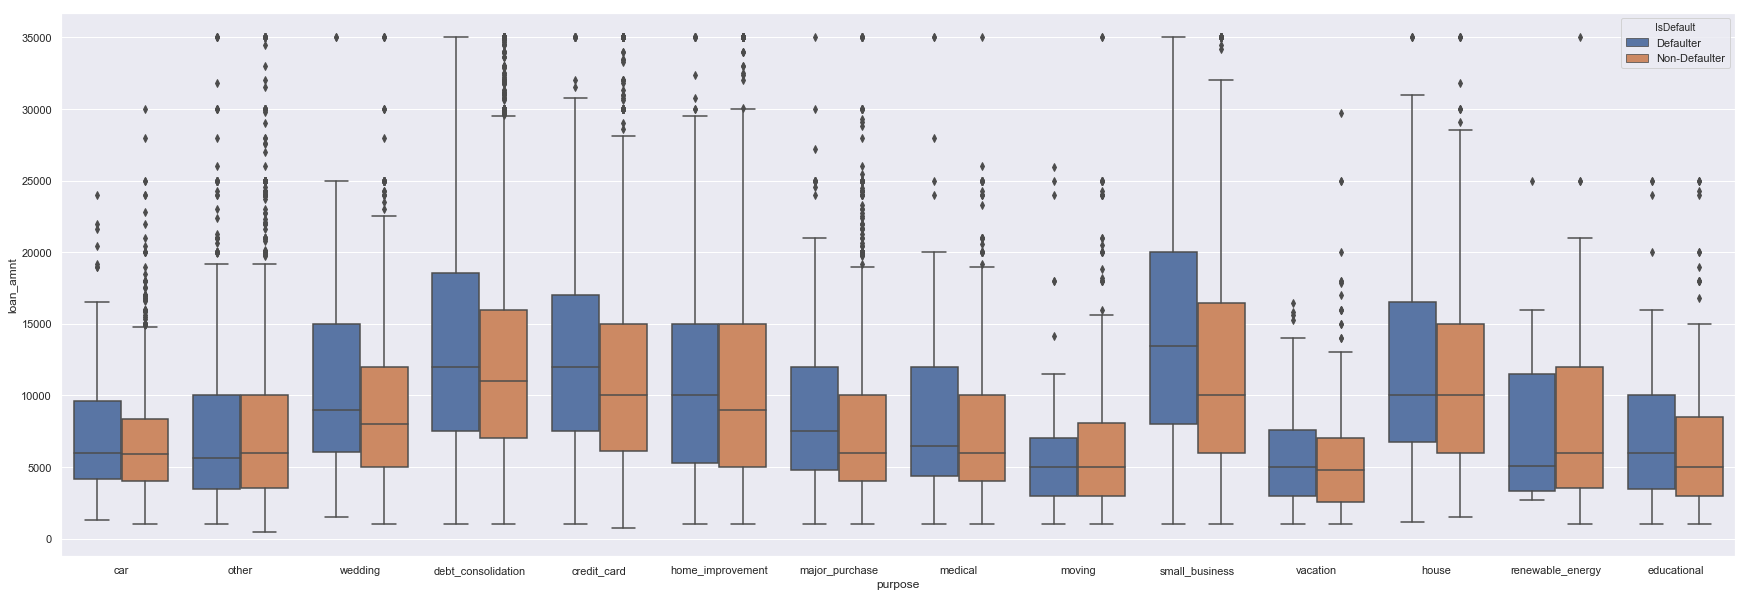

In [140]:
plot_categorical_numerical_multivariate(loan_data,'purpose','loan_amnt','IsDefault')

**Insights:**
1. Bigger loan amounts in Small Business are more likely to be Defaulted.
2. Bigger loan amounts are also seen getting Defaulted in Debt Consolidation, Credit Card and House purposes.
3. Almost all purposes have equal proportion of Defaulters and Non-Defaulters except for Renewable Energy, Education, medical, wedding, car, medical having slightly more Defaulters.

#### Sub Grade Vs Loan Amount Over IsDefault

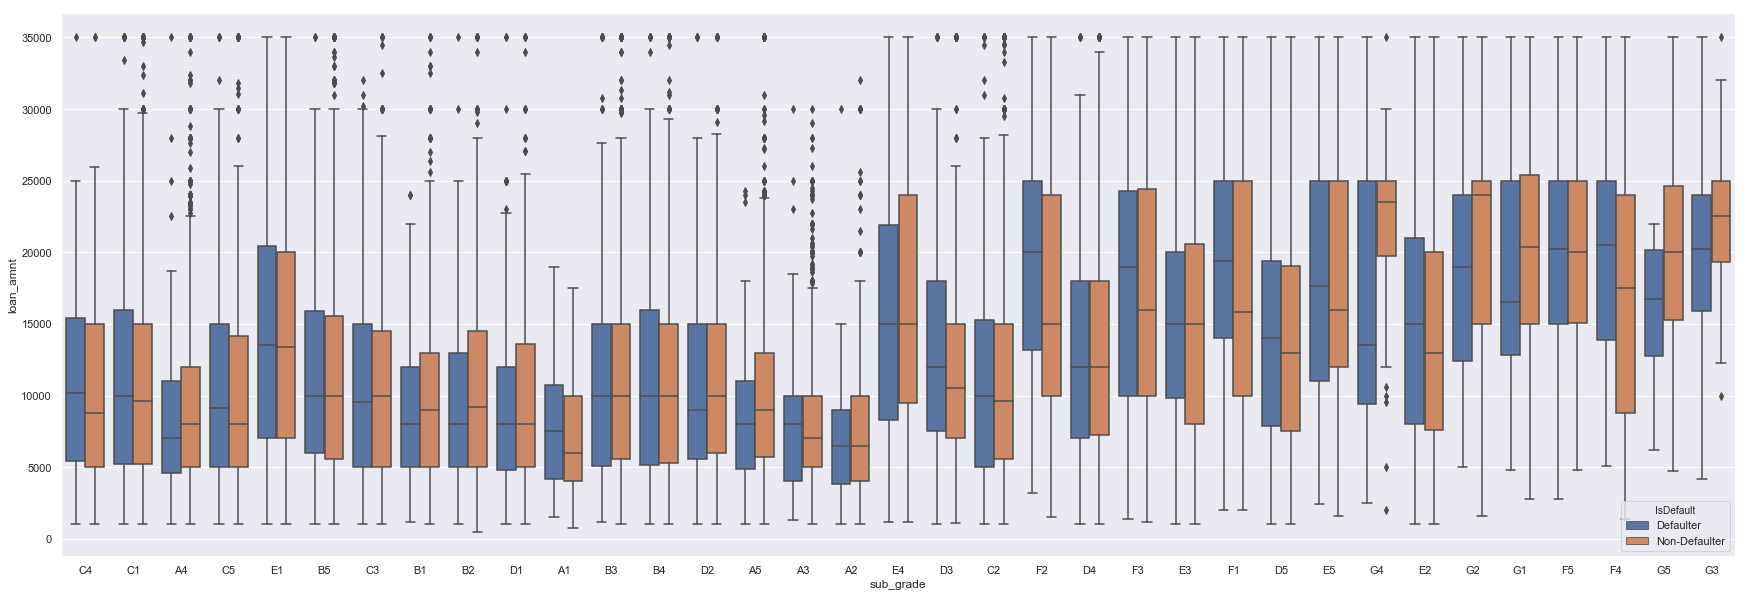

In [141]:
plot_categorical_numerical_multivariate(loan_data,'sub_grade','loan_amnt','IsDefault')

**Insights:**
1. G4 is the sub grade where Defaulters are considerably more than the Non-Defaulters and the mean Loan Amount of this sub grade of Defaulted Loans is much lower than the the mean Loan Amount of the Non-Defaulted Loans.
2. The mean Loan Amount of F4 sub grade of Defaulted Loans is higher than the the mean Loan Amount of the Non-Defaulted Loans.

#### Home Ownership Vs Loan Amount Over IsDefault

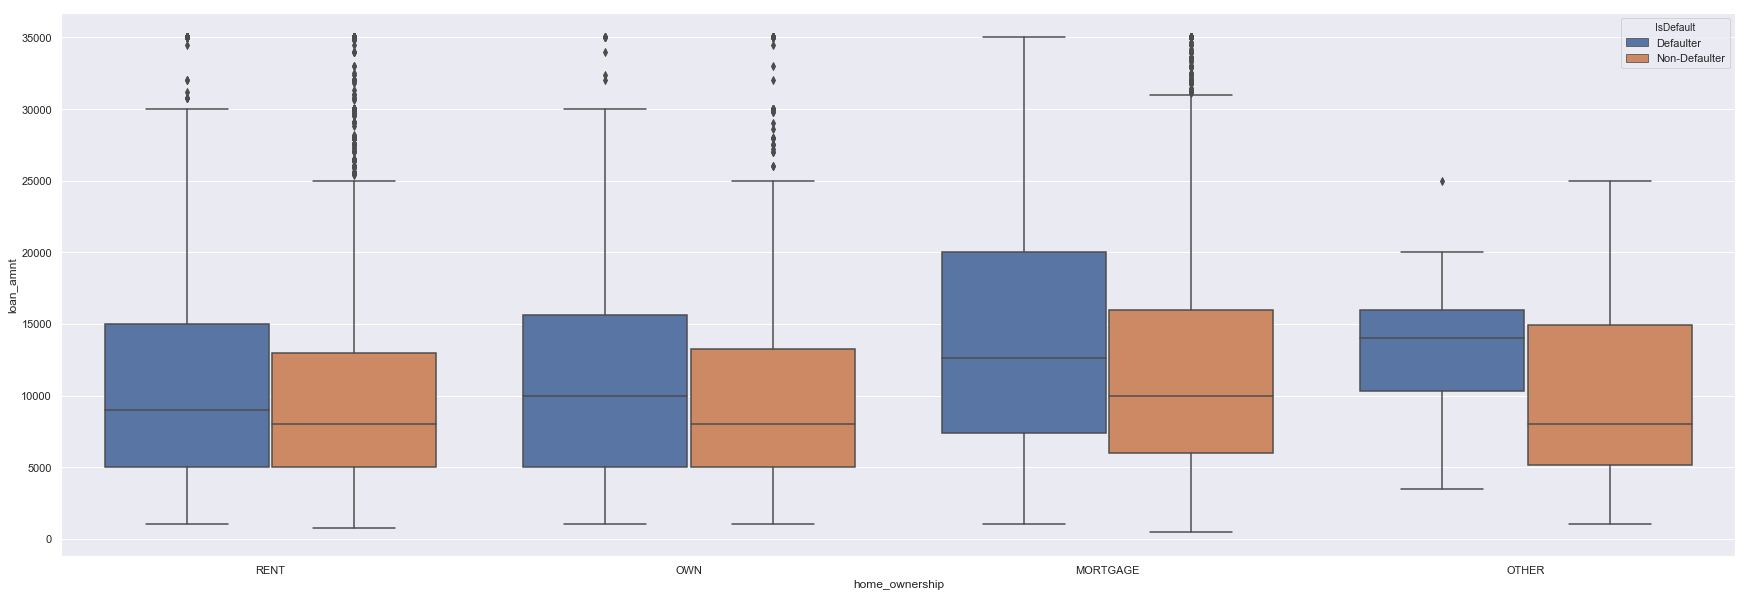

In [142]:
plot_categorical_numerical_multivariate(loan_data,'home_ownership','loan_amnt','IsDefault')

**Insights:**
1. It appers that loans getting defaulted are similar for people having either Rent or Own properties
2. People having Mortgaged propoerties appears to Default more loans and have taken more loan amount.

# Recommendations


The action which can be taken for High-Risk borrowers are increase interest rate, reduce loan amount.<br>
<br>Borrowers with annual income to loan amount ratio less than 10.
<br>Borrowers with revolving utilization rate greater than 70%.
<br>Borrowers asking for Small Business purpose.
<br>Borrowers asking for Debt Consolidation purpose of the loan.
<br>Borrowers with DTI greater than 20.
<br>Borrowers applying for very high loan amounts and not having a house (not even rented).
<br>Borrowers with higher public record bankruptcies.
<br>Borrowers from Nevada asking for Small Business purpose loans.
<br>Borrowers with age more than 70 years.
